<font color='skyblue' size='5'> <b> Telecom Churn Case Study </b> </font>

<font size='4'> <b> Business problem </b></font>

    In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

    So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [1]:
###########################################################################################################
##  Program Name        : Telecom Churn Case Study
##
##  Author(s)           : Prachi Sharma
##                        Chandan Kumar 
###########################################################################################################

In [2]:
import numpy as np
print('numpy version\t:',np.__version__)

import pandas as pd
print('pandas version\t:',pd.__version__)

import seaborn as sns
print('seaborn version\t:',sns.__version__)

import os
import platform
print('Python version\t:',platform.python_version())

# Ignore warning due to version mismatch
import warnings
warnings.filterwarnings('ignore') 

# To display all the columns
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import stats

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# Machine Learning related libraries
%matplotlib inline
import matplotlib.pyplot as plt # for plotting

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA #Improting the PCA module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF

numpy version	: 1.18.2
pandas version	: 0.25.3
seaborn version	: 0.9.1
Python version	: 3.5.6


# Stage 1 : Data understanding, preparation, and feature engineering

## Data Sourcing and Understanding 


In [3]:
# Source the dataset in a dataframe

rawdata = pd.read_csv('./telecom_churn_data.csv')

# Check the Shape of the dataframe
nRow, nCol = rawdata.shape
print("There are ",nRow ,"rows and ",nCol," columns")

# Lets read first 5 records to understand the dataset
rawdata.head()


There are  99999 rows and  226  columns


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [4]:
def explain_dataframe(dataframe):
    print("Info : \n")
    display(dataframe.info())
    print("\n Description : ")
    display(dataframe.describe())

explain_dataframe(rawdata)

Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


None


 Description : 


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count        99,999.00  99,999.00       98,981.00       98,981.00   
mean  7,001,207,270.39     109.00            0.00            0.00   
std         695,669.39       0.00            0.00            0.00   
min   7,000,000,074.00     109.00            0.00            0.00   
25%   7,000,606,232.50     109.00            0.00            0.00   
50%   7,001,204,632.00     109.00            0.00            0.00   
75%   7,001,812,030.50     109.00            0.00            0.00   
max   7,002,410,905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
count       98,981.00 99,999.00 99,999.00 99,999.00 99,999.00    96,062.00   
mean             0.00    282.99    278.54    279.15    261.65       132.40   
std              0.00    328.44    338.16    344.47    342.00       297.21   
min              0.00 -2,258.71 -2,014.05   -945.81 -1,899.51         0.00   
25%              0.00     93.41     86.98     84.13     62.69         7.38   
50%              0.00    197.70    191.64    192.08    176.85        34.31   
75%              0.00    371.06    365.34    369.37    353.47       118.74   
max              0.00 27,731.09 35,145.83 33,543.62 38,805.62     7,376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count    96,140.00    94,621.00    92,254.00     96,062.00     96,140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max       8,157.78    10,752.56    10,427.46      8,362.36      9,667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count     94,621.00     92,254.00      96,062.00      96,140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max       14,007.34     10,310.76      13,724.38      15,371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count      94,621.00      92,254.00      96,062.00      96,140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max        13,095.36       8,464.03       3,775.11       2,812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count      94,621.00      92,254.00         96,062.00         96,140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max         5,337.04       4,428.46          6,431.33          7,400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count         94

    The last four columns started with month names - jun. jul, aug, sep. 
    
    Since the nomenclature for all monthly columns are given with month numbers instead of names. 
    
    So rename these columns according to their month number

## Find high Value customers first before data cleaning


In [5]:
# Rename few Columns
rawdata.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

# Read top 5 records again
rawdata.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

<font size='4'> <b> Churn definition : To Calculate High value customers </b></font>


Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

Our dataset is divided into 3 phases:

    Good phase wherein the customer is happy with the service

    Action pase wherein the customer wasn't happy with service or got a better offer from competitor etc. In this phase, the customer usually shows different behaviour than the good phase. Also, it is crucial to identify high-churn-risk customers in this phase, so that some corrective actions can be taken at this point to prevet churn

    Churn phase wherein the customer would have churned

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).


After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

Lets first Identify high Value customers

<font size='4'><b>Find average recharge amount in the first two months</b></font>

    First calculate the total data recharge amount for good phase(i.e. month 6 and 7) and action phase(month 8) using the equation (total_rech_data * av_rech_amt_data)

    Then calculate the average recharge amount in the first two months (the good phase). i.e month 6 and 7 using the equation (total_rech_amt_6 + total_data_rech_6 + total_rech_amt_7 + total_data_rech_7)/2

Lets check if both columns for each month has null values at same index

In [6]:
# Get the index of null values for both columns and verify if both matches 

res6 = rawdata.total_rech_data_6[rawdata.total_rech_data_6.isna()].index != rawdata.av_rech_amt_data_6[rawdata.av_rech_amt_data_6.isna()].index
print('June :', res6.any())

res7 = rawdata.total_rech_data_7[rawdata.total_rech_data_7.isna()].index != rawdata.av_rech_amt_data_7[rawdata.av_rech_amt_data_7.isna()].index
print('July :', res7.any())

res8 = rawdata.total_rech_data_8[rawdata.total_rech_data_8.isna()].index != rawdata.av_rech_amt_data_8[rawdata.av_rech_amt_data_8.isna()].index
print('Aug :', res8.any())

June : False
July : False
Aug : False


    From above output, now we know that if total_rech_data is null then av_rech_amt_data is also null

    So Lets check the null count and impute null values with 0 for both features for each month

In [7]:
# finding the count of NULL values in these columns
print(rawdata.loc[:, [col for col in rawdata.columns if 'total_rech_data_' in col]].isnull().sum())
print(rawdata.loc[:, [col for col in rawdata.columns if 'av_rech_amt_data_' in col]].isnull().sum())

total_rech_data_6    74846
total_rech_data_7    74428
total_rech_data_8    73660
total_rech_data_9    74077
dtype: int64
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64


In [8]:
# Impute values with 0 as these columns are in use for high value customers filter
rawdata.total_rech_data_6.fillna(0, inplace=True)
rawdata.total_rech_data_7.fillna(0, inplace=True)
rawdata.total_rech_data_8.fillna(0, inplace=True)

rawdata.av_rech_amt_data_6.fillna(0, inplace=True)
rawdata.av_rech_amt_data_7.fillna(0, inplace=True)
rawdata.av_rech_amt_data_8.fillna(0, inplace=True)

In [9]:
# Check if there are NULL values in total_rech_amnt monthly columns
print(rawdata['total_rech_amt_6'].isna().sum())
print(rawdata['total_rech_amt_7'].isna().sum())
print(rawdata['total_rech_amt_8'].isna().sum())

0
0
0


In [10]:
# Check the information of total recharge amount columns
rawdata[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count         99,999.00         99,999.00         99,999.00
mean             327.51            322.96            324.16
std              398.02            408.11            416.54
min                0.00              0.00              0.00
25%              109.00            100.00             90.00
50%              230.00            220.00            225.00
75%              437.50            428.00            434.50
90%              732.00            731.00            736.00
95%              994.00            993.00            996.00
99%            1,683.02          1,728.00          1,721.00
100%          35,190.00         40,335.00         45,320.00
max           35,190.00         40,335.00         45,320.00

    So, There are no null values in total_rech_amt columns of all three months

In [11]:
#Function to check categorical or continuous columns
def column_type_analysis(dataframe):
    numerical_df = dataframe.select_dtypes(include='number')
    categorical_df = dataframe.select_dtypes(exclude='number')
    print('Total Numerical columns : {}'.format(numerical_df.shape[1]))
    print('Total Categorical columns : {}'.format(categorical_df.shape[1]))
    return numerical_df, categorical_df

In [12]:
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(rawdata)

Total Numerical columns : 214
Total Categorical columns : 12


<b> Lets derive some new features </b>

In [13]:
# Total data recharge amount
rawdata['total_data_rech_amt_6'] = rawdata['total_rech_data_6'] * rawdata['av_rech_amt_data_6']
rawdata['total_data_rech_amt_7'] = rawdata['total_rech_data_7'] * rawdata['av_rech_amt_data_7']
rawdata['total_data_rech_amt_8'] = rawdata['total_rech_data_8'] * rawdata['av_rech_amt_data_8']

# Total amount from data recharge and ic/og calls
rawdata['call_data_amt_6'] = rawdata[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
rawdata['call_data_amt_7'] = rawdata[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
rawdata['call_data_amt_8'] = rawdata[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

# Average of amount for first 2 months
rawdata['good_phase_amt_avg'] = rawdata[['call_data_amt_6','call_data_amt_7']].mean(axis=1)
rawdata['action_phase_amt_avg'] = rawdata[['call_data_amt_8']]

    As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile.

    But if we use greater than or equal to, we end up getting a little above 30K records as against to 29.9K records.

    But, if we use greater than symbol then we can get 29.9K high value customers to meet problem checkpoint.


In [14]:
rawdata[['good_phase_amt_avg', 'total_rech_amt_6', 'total_rech_amt_7', 'total_data_rech_amt_6', 'total_data_rech_amt_7']].head()

good_phase_amt_avg  total_rech_amt_6  total_rech_amt_7  \
0              559.00               362               252   
1              306.00                74               384   
2              241.50               168               315   
3              270.00               230               310   
4              301.00               196               350   

   total_data_rech_amt_6  total_data_rech_amt_7  
0                 252.00                 252.00  
1                   0.00                 154.00  
2                   0.00                   0.00  
3                   0.00                   0.00  
4                  56.00                   0.00

In [15]:
# Print the customers count with recharge amount more than 70th percentile
print("Number of high value filtered customers are : ",(rawdata['good_phase_amt_avg'] >= rawdata['good_phase_amt_avg'].quantile(0.7)).value_counts())
print("\n")
# Filter the records of high value customers whose recharge amount should be more than 70th percentile.

df_hvc = rawdata[(rawdata['good_phase_amt_avg'] >= rawdata['good_phase_amt_avg'].quantile(0.7))]

print("70th percentile of the average recharge amount in the first two months  =", rawdata.good_phase_amt_avg.quantile(0.7))

#Look at Information
print("Dataframe Info: \n")
df_hvc.info()

Number of high value filtered customers are :  False    69998
True     30001
Name: good_phase_amt_avg, dtype: int64


70th percentile of the average recharge amount in the first two months  = 478.0
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 234 entries, mobile_number to action_phase_amt_avg
dtypes: float64(187), int64(35), object(12)
memory usage: 53.8+ MB


In [16]:
print("Number of rows before filtering the high value customers =", len(rawdata))
df_hvc = pd.DataFrame(rawdata.loc[rawdata['good_phase_amt_avg'] >= rawdata.good_phase_amt_avg.quantile(0.7)])
print("Number of rows after filtering the high value customers =", len(df_hvc))

Number of rows before filtering the high value customers = 99999
Number of rows after filtering the high value customers = 30001


<font size='4'> <b> Churn customers </b> </font>

<b>Tag churners and remove attributes of the churn phase</b>

    Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [17]:
df_hvc['churn'] = np.where(
                            ((df_hvc['total_ic_mou_9'] == 0.00) | (df_hvc['total_og_mou_9'] == 0.00))
                            & ((df_hvc['vol_2g_mb_9'] == 0.00) | (df_hvc['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

print(df_hvc['churn'].value_counts())
print(df_hvc['churn'].value_counts()/df_hvc.shape[0])

0    26735
1     3266
Name: churn, dtype: int64
0   0.89
1   0.11
Name: churn, dtype: float64


In [18]:
df_hvc[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head(10)

churn  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0       1            0.00            0.00         0.00         0.00
7       1            0.00            0.00         0.00         0.00
8       0           34.91          142.18         0.00         0.00
21      0          252.61        1,031.53         0.00         0.00
23      0          127.48          127.63        13.93       314.74
33      0          114.16            1.70        30.92     5,588.11
38      0          114.09          708.04         0.00         0.00
41      0          165.84           89.13         0.00         0.00
48      0          894.81        2,319.01         0.00         0.00
53      0          680.61          503.06         0.82         0.00

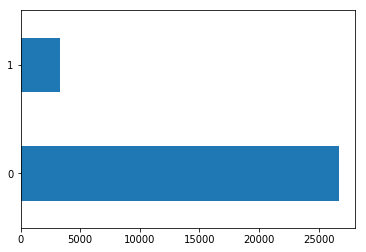

In [19]:
# Check the unique values count in churn column
df_hvc.churn.value_counts()
df_hvc['churn'].value_counts().plot(kind='barh')

## Data Cleaning and Manipulation

In [20]:
# Function to drop one or more columns

def dropColumns(df, column_list):
    for column in column_list:
        print('Dropping', column, '...')
        try:
            df.drop(column, axis=1, inplace=True)
        except:
            print('\tColumn already dropped...')
            continue

<b> After defining the y variable by tagging churners, lets delete the columns having _9 string in their names </b>

    After tagging churners, remove all the attributes corresponding to the churn phase(all attributes having ‘ _9’, etc. in their names).

    Get the list of columns which has name ends with _9 attribute

In [21]:
# find the columns which has name ends with _9 attribute
month_9_columns = df_hvc.columns[df_hvc.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_columns

The columns names ends with _9 are given below...


Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

<b> Drop the columns of churn phase month i.e., 9th Month </b>

In [22]:
# Drop all the columns of churn phase
dropColumns(df_hvc, month_9_columns)
df_hvc.head()

Dropping last_date_of_month_9 ...
Dropping arpu_9 ...
Dropping onnet_mou_9 ...
Dropping offnet_mou_9 ...
Dropping roam_ic_mou_9 ...
Dropping roam_og_mou_9 ...
Dropping loc_og_t2t_mou_9 ...
Dropping loc_og_t2m_mou_9 ...
Dropping loc_og_t2f_mou_9 ...
Dropping loc_og_t2c_mou_9 ...
Dropping loc_og_mou_9 ...
Dropping std_og_t2t_mou_9 ...
Dropping std_og_t2m_mou_9 ...
Dropping std_og_t2f_mou_9 ...
Dropping std_og_t2c_mou_9 ...
Dropping std_og_mou_9 ...
Dropping isd_og_mou_9 ...
Dropping spl_og_mou_9 ...
Dropping og_others_9 ...
Dropping total_og_mou_9 ...
Dropping loc_ic_t2t_mou_9 ...
Dropping loc_ic_t2m_mou_9 ...
Dropping loc_ic_t2f_mou_9 ...
Dropping loc_ic_mou_9 ...
Dropping std_ic_t2t_mou_9 ...
Dropping std_ic_t2m_mou_9 ...
Dropping std_ic_t2f_mou_9 ...
Dropping std_ic_t2o_mou_9 ...
Dropping std_ic_mou_9 ...
Dropping total_ic_mou_9 ...
Dropping spl_ic_mou_9 ...
Dropping isd_ic_mou_9 ...
Dropping ic_others_9 ...
Dropping total_rech_num_9 ...
Dropping total_rech_amt_9 ...
Dropping max_rech

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109            0.00            0.00            0.00   
7      7000701601        109            0.00            0.00            0.00   
8      7001524846        109            0.00            0.00            0.00   
21     7002124215        109            0.00            0.00            0.00   
23     7000887461        109            0.00            0.00            0.00   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.38   
7             6/30/2014            7/31/2014            8/31/2014 1,069.18   
8             6/30/2014            7/31/2014            8/31/2014   378.72   
21            6/30/2014            7/31/2014            8/31/2014   514.45   
23            6/30/2014            7/31/2014            8/31/2014    74.35   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.82   213.80          nan          nan         0.00           nan   
7  1,349.85 3,171.48        57.84        54.68        52.29        453.43   
8    492.22   137.36       413.69       351.03        35.08         94.66   
21   597.75   637.76       102.41       132.11        85.14        757.93   
23   193.90   366.97        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            nan          0.00            nan            nan           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             nan            nan           0.00               nan   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                nan              0.00               nan               nan   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               nan               nan              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                nan               nan              0.00           nan   
7               0.00              0.00              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              0.00              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            nan          0.00               nan               nan   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74        

In [23]:
# Check the Shape of the high value customer dataframe
nRow, nCol = df_hvc.shape
print("There are ",nRow ,"rows and ",nCol," columns")

There are  30001 rows and  180  columns


<b> Find the columns which has unique values </b>

In [24]:
# function to Calculate percentage
def calculate_percentage(value, base, round_digits = 2):
    return round((value/base)*100, round_digits)

In [25]:
# Check Missing value percentage for each columns
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df_hvc.isnull().sum()/len(df_hvc))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
133           count_rech_3g_8     46.83
148                 arpu_2g_8     46.83
121  date_of_last_rech_data_8     46.83
130           count_rech_2g_8     46.83
151          night_pck_user_8     46.83
127           max_rech_data_8     46.83
166                 fb_user_8     46.83
145                 arpu_3g_8     46.83
149          night_pck_user_6     44.15
143                 arpu_3g_6     44.15
164                 fb_user_6     44.15
131           count_rech_3g_6     44.15
146                 arpu_2g_6     44.15
119  date_of_last_rech_data_6     44.15
128           count_rech_2g_6     44.15
125           max_rech_data_6     44.15
165                 fb_user_7     43.15
120  date_of_last_rech_data_7     43.15
144                 arpu_3g_7     43.15
126           max_rech_data_7     43.15
129           count_rech_2g_7     43.15
147                 arpu_2g_7     43.15
132           count_rech_3g_7     43.15
150          night_pck_user_7     43.15
70           loc_ic_t2m_mou_8      3.91
58               spl_og_mou_8      3.91
76               loc_ic_mou_8      3.91
73           loc_ic_t2f_mou_8      3.91
55               isd_og_mou_8      3.91
40           std_og_t2t_mou_8      3.91
61                og_others_8      3.91
79           std_ic_t2t_mou_8      3.91
52               std_og_mou_8      3.91
82           std_ic_t2m_mou_8      3.91
49           std_og_t2c_mou_8      3.91
85           std_ic_t2f_mou_8      3.91
46           std_og_t2f_mou_8      3.91
88           std_ic_t2o_mou_8      3.91
43           std_og_t2m_mou_8      3.91
91               std_ic_mou_8      3.91
103               ic_others_8      3.91
31           loc_og_t2f_mou_8      3.91
34           loc_og_t2c_mou_8      3.91
13                onnet_mou_8      3.91
16               offnet_mou_8      3.91
19              roam_ic_mou_8      3.91
22              roam_og_mou_8      3.91
25           loc_og_t2t_mou_8      3.91
28           loc_og_t2m_mou_8      3.91
67           loc_ic_t2t_mou_8      3.91
100              isd_ic_mou_8      3.91
37               loc_og_mou_8      3.91
97               spl_ic_mou_8      3.91
115       date_of_last_rech_8      1.94
101               ic_others_6      1.82
80           std_ic_t2m_mou_6      1.82
65           loc_ic_t2t_mou_6      1.82
89               std_ic_mou_6      1.82
77           std_ic_t2t_mou_6      1.82
83           std_ic_t2f_mou_6      1.82
74               loc_ic_mou_6      1.82
98               isd_ic_mou_6      1.82
86           std_ic_t2o_mou_6      1.82
68           loc_ic_t2m_mou_6      1.82
95               spl_ic_mou_6      1.82
71           loc_ic_t2f_mou_6      1.82
26           loc_og_t2m_mou_6      1.82
23           loc_og_t2t_mou_6      1.82
35               loc_og_mou_6      1.82
41           std_og_t2m_mou_6      1.82
44           std_og_t2f_mou_6      1.82
32           loc_og_t2c_mou_6      1.82
47           std_og_t2c_mou_6      1.82
29           loc_og_t2f_mou_6      1.82
50               std_og_mou_6      1.82
53               isd_og_mou_6      1.82
38           std_og_t2t_mou_6      1.82
20              roam_og_mou_6      1.82
11                onnet_mou_6      1.82
59                og_others_6      1.82
17              roam_ic_mou_6      1.82
56               spl_og_mou_6      1.82
14               offnet_mou_6      1.82
21              roam_og_mou_7      1.79
102               ic_others_7      1.79
36               loc_og_mou_7      1.79
99               isd_ic_mou_7      1.79
12                onnet_mou_7      1.79
33           loc_og_t2c_mou_7      1.79
30           loc_og_t2f_mou_7      1.79
15               offnet_mou_7      1.79
27           loc_og_t2m_mou_7      1.79
18              roam_ic_mou_7      1.79
96               spl_ic_mou_7      1.79
24           loc_og_t2t_mou_7      1.79
66           loc_ic_t2t_mou_7      1.79
90               std_ic_mou_7      1.79
39           std_og_t2t_mou_7      1.79
48           std_og_t2c_mou_7      1.79
69           loc_ic_t2

In [26]:
# Delete all such columns having unique values less than 2

count = 0
cols = []
for col in df_hvc.columns:
    if df_hvc[col].nunique() < 2 or df_hvc[col].nunique() == nRow:
        count+=1
        print(count, " ColName = ", col,
              ",\t UniqueValues = ", df_hvc[col].unique(),
              ",\t Dtype = ", df_hvc[col].dtype)
        cols.append(col)

1  ColName =  mobile_number ,	 UniqueValues =  [7000842753 7000701601 7001524846 ... 7001729035 7002111859 7000498689] ,	 Dtype =  int64
2  ColName =  circle_id ,	 UniqueValues =  [109] ,	 Dtype =  int64
3  ColName =  loc_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
4  ColName =  std_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
5  ColName =  loc_ic_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
6  ColName =  last_date_of_month_6 ,	 UniqueValues =  ['6/30/2014'] ,	 Dtype =  object
7  ColName =  last_date_of_month_7 ,	 UniqueValues =  ['7/31/2014' nan] ,	 Dtype =  object
8  ColName =  last_date_of_month_8 ,	 UniqueValues =  ['8/31/2014' nan] ,	 Dtype =  object
9  ColName =  std_og_t2c_mou_6 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
10  ColName =  std_og_t2c_mou_7 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
11  ColName =  std_og_t2c_mou_8 ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
12  ColName =  std_ic_t2o_mou_6 ,	 UniqueValues =  

In [27]:
# Drop these above columns
dropColumns(df_hvc, cols)

# Check the dataframe shape
nRow, nCol = df_hvc.shape
print("In df_hvc, there are ",nRow ,"rows and ",nCol," columns now")

Dropping mobile_number ...
Dropping circle_id ...
Dropping loc_og_t2o_mou ...
Dropping std_og_t2o_mou ...
Dropping loc_ic_t2o_mou ...
Dropping last_date_of_month_6 ...
Dropping last_date_of_month_7 ...
Dropping last_date_of_month_8 ...
Dropping std_og_t2c_mou_6 ...
Dropping std_og_t2c_mou_7 ...
Dropping std_og_t2c_mou_8 ...
Dropping std_ic_t2o_mou_6 ...
Dropping std_ic_t2o_mou_7 ...
Dropping std_ic_t2o_mou_8 ...
In df_hvc, there are  30001 rows and  166  columns now


In [28]:
# Analyse column types
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(df_hvc)

Total Numerical columns : 160
Total Categorical columns : 6


<font size='4'><b> Treat rows with null values more than 70% </b></font>

Delete the rows which has more than 70% null values

In [29]:
null_percentage = 0.70
na_perc_rows = round(df_hvc.isnull().sum(axis=1) / len(df_hvc.columns),2 )
print("\nBefore dropping : Number of rows which has more than 70% NULL values = ", na_perc_rows[na_perc_rows > null_percentage].count())

thres = np.int(len(df_hvc.columns)*round(1-null_percentage, 1))
print("Before dropping : Threshold value = ", thres)

print("Before dropping : Total Number of rows = ", len(df_hvc))
df_hvc.dropna(thresh=thres,inplace=True)

na_perc_rows = round(df_hvc.isnull().sum(axis=1) / len(df_hvc.columns),2 )
print("\nAfter dropping : Number of rows which has more than 70% NULL values = ", na_perc_rows[na_perc_rows > null_percentage].count())
print("After dropping : Total Number of rows = ", len(df_hvc))


Before dropping : Number of rows which has more than 70% NULL values =  0
Before dropping : Threshold value =  49
Before dropping : Total Number of rows =  30001

After dropping : Number of rows which has more than 70% NULL values =  0
After dropping : Total Number of rows =  30001


    - Lets handle NaN values in columns which doesn't have unique values

<b> Get the percentage for null values in each columns </b>

In [30]:
na_percent = round(df_hvc.isnull().sum() / len(df_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())
na_percent.sort_values(ascending=False)

Number of columns which has atleast one null value is 108


fb_user_8                  46.83
arpu_2g_8                  46.83
count_rech_2g_8            46.83
count_rech_3g_8            46.83
date_of_last_rech_data_8   46.83
max_rech_data_8            46.83
arpu_3g_8                  46.83
night_pck_user_8           46.83
date_of_last_rech_data_6   44.15
arpu_2g_6                  44.15
night_pck_user_6           44.15
arpu_3g_6                  44.15
max_rech_data_6            44.15
count_rech_3g_6            44.15
fb_user_6                  44.15
count_rech_2g_6            44.15
fb_user_7                  43.15
max_rech_data_7            43.15
date_of_last_rech_data_7   43.15
count_rech_2g_7            43.15
arpu_3g_7                  43.15
arpu_2g_7                  43.15
night_pck_user_7           43.15
count_rech_3g_7            43.15
std_og_t2t_mou_8            3.91
loc_ic_t2f_mou_8            3.91
loc_ic_t2t_mou_8            3.91
og_others_8                 3.91
spl_og_mou_8                3.91
isd_og_mou_8                3.91
std_og_mou

<font size='3'> <b> Treat columns with null values </b> </font>

    Analyse and impute missing values for MOU columns

MOU = Minutes of usage - voice calls if the entry is empty then it means calls are not made so we can impute 0 for missing values here.

    ONNET = All kind of calls within the same operator network
    OFFNET = All kind of calls outside the operator T network
    IC = Incoming calls
    ROAM = Indicates that customer is in roaming zone during the call
    OG = Outgoing calls
    LOC = Local calls - within same telecom circle
    STD = STD calls - outside the calling circle
    T2T = Operator T to T, i.e. within same operator (mobile to mobile)
    T2M = Operator T to other operator mobile
    T2F = Operator T to fixed lines of T
    T2C = Operator T to it’s own call center
    T2O = Operator T to other operator fixed line


In [31]:
mou_columns = df_hvc.columns[df_hvc.columns.str.contains(pat = '_mou')]
print("MOU columns\n", mou_columns.values)

MOU columns
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 'loc_ic_t2m_mou_7' 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6'
 'loc_ic_t2f_mou_7' 'loc_i

In [32]:
print(na_percent[mou_columns].unique())
df_hvc[mou_columns].head(2)

[1.82 1.79 3.91  nan]


onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0          nan          nan         0.00           nan           nan   
7        57.84        54.68        52.29        453.43        567.16   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00            nan            nan           0.00            nan   
7        325.91          16.23          33.49          31.64          23.74   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            nan           0.00               nan               nan   
7          12.59          38.06             51.39             31.38   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00               nan               nan              0.00   
7             40.28            308.63            447.38            162.28   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0               nan               nan              0.00               nan   
7             62.13             55.14             53.23              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               nan              0.00           nan           nan   
7              0.00              0.00        422.16        533.91   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          0.00               nan               nan              0.00   
7        255.79              4.30             23.29             12.01   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0               nan               nan              0.00               nan   
7             49.89             31.76             49.14              6.66   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0               nan              0.00           nan           nan   
7             20.08             16.68         60.86         75.14   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00           nan           nan          0.00           nan   
7         77.84          0.00          0.18         10.01          4.50   

   spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0           nan          0.00            0.00            0.00            0.00   
7          0.00          6.50          487.53          609.24          350.16   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               nan               nan              0.16               nan   
7             58.14             32.26             27.31            217.56   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0               nan              4.13               nan               nan   
7            221.49            121.19            152.16            101.46   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0              1.15           nan           nan          5.44   
7             39.53        427.88        355.23        188.04   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0               nan               nan              0.00               nan   
7             36.89             11.83             30.39             91.44   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0               nan              0.00               nan               nan   
7            126.99            141.33             52.19             34.24   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0              0.00           nan           nan          0.00            0.00   
7             22.21        180.54        173.08        193.94          626.46   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0            0.00            5.44           nan           nan          0.00   
7     

    All above fields have very small amount of missing values(less than 4%).
    
    Here 0 indicates not used so we can impute null values with 0.
    
    Imputing missing values with 0 for all the MOU columns

In [33]:
df_hvc[mou_columns] = df_hvc[mou_columns].fillna(0)
print("Null Value counts:", df_hvc[mou_columns].isnull().sum().unique())
df_hvc[mou_columns].head(2)

Null Value counts: [0]


onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
7        57.84        54.68        52.29        453.43        567.16   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00           0.00           0.00           0.00           0.00   
7        325.91          16.23          33.49          31.64          23.74   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00           0.00              0.00              0.00   
7          12.59          38.06             51.39             31.38   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
7             40.28            308.63            447.38            162.28   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
7             62.13             55.14             53.23              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          0.00          0.00   
7              0.00              0.00        422.16        533.91   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          0.00              0.00              0.00              0.00   
7        255.79              4.30             23.29             12.01   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
7             49.89             31.76             49.14              6.66   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0              0.00              0.00          0.00          0.00   
7             20.08             16.68         60.86         75.14   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00          0.00          0.00          0.00          0.00   
7         77.84          0.00          0.18         10.01          4.50   

   spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.00          0.00            0.00            0.00            0.00   
7          0.00          6.50          487.53          609.24          350.16   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0              0.00              0.00              0.16              0.00   
7             58.14             32.26             27.31            217.56   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0              0.00              4.13              0.00              0.00   
7            221.49            121.19            152.16            101.46   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0              1.15          0.00          0.00          5.44   
7             39.53        427.88        355.23        188.04   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
7             36.89             11.83             30.39             91.44   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
7            126.99            141.33             52.19             34.24   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0              0.00          0.00          0.00          0.00            0.00   
7             22.21        180.54        173.08        193.94          626.46   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0            0.00            5.44          0.00          0.00          0.00   
7     

    Analyse and impute missing values for OTHERS columns

In [34]:
others_cols = df_hvc.columns[df_hvc.columns.str.contains(pat = '_others_')]
df_hvc[others_cols].head()

og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
0           nan          nan         0.00          nan          nan   
7          0.00         0.00         0.00        15.74        15.19   
8          0.00         0.00         0.00         0.00         0.00   
21         0.00         0.00         0.00         0.00         0.00   
23         0.00         0.00         0.00         0.00         5.35   

    ic_others_8  
0          0.00  
7         15.14  
8          0.00  
21         0.00  
23        13.06

In [35]:
print(na_percent[others_cols].unique())
df_hvc[others_cols].head(2)

[1.82 1.79 3.91]


og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
0          nan          nan         0.00          nan          nan   
7         0.00         0.00         0.00        15.74        15.19   

   ic_others_8  
0         0.00  
7        15.14

    All above fields have very small amount of missing values(less than 4%).
    
    Here 0 indicates not used so we can impute null values with 0.
    
    Imputing Missing values with 0 for all the Others columns.

In [36]:
df_hvc[others_cols] = df_hvc[others_cols].fillna(0)
print("Null Value counts:", df_hvc[others_cols].isnull().sum().unique())
df_hvc[others_cols].head(2)

Null Value counts: [0]


og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
0         0.00         0.00         0.00         0.00         0.00   
7         0.00         0.00         0.00        15.74        15.19   

   ic_others_8  
0         0.00  
7        15.14

    Imputing date of last recharge columns

In [37]:
tel_categorical_columns_df.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [38]:
# Impute NaN values with end of month date by default
df_hvc.date_of_last_rech_6.fillna('6/30/2014', inplace=True)
df_hvc.date_of_last_rech_7.fillna('7/31/2014', inplace=True)
df_hvc.date_of_last_rech_8.fillna('8/31/2014', inplace=True)

df_hvc.date_of_last_rech_data_6.fillna('6/30/2014', inplace=True)
df_hvc.date_of_last_rech_data_7.fillna('7/31/2014', inplace=True)
df_hvc.date_of_last_rech_data_8.fillna('8/31/2014', inplace=True)

In [39]:
df_hvc['date_of_last_rech_6'] = pd.to_datetime(df_hvc['date_of_last_rech_6'])
df_hvc['date_of_last_rech_7'] = pd.to_datetime(df_hvc['date_of_last_rech_7'])
df_hvc['date_of_last_rech_8'] = pd.to_datetime(df_hvc['date_of_last_rech_8'])

df_hvc['date_of_last_rech_data_6'] = pd.to_datetime(df_hvc['date_of_last_rech_data_6'])
df_hvc['date_of_last_rech_data_7'] = pd.to_datetime(df_hvc['date_of_last_rech_data_7'])
df_hvc['date_of_last_rech_data_8'] = pd.to_datetime(df_hvc['date_of_last_rech_data_8'])

In [40]:
df_hvc['day_of_last_rech_6'] = df_hvc['date_of_last_rech_6'].dt.day
df_hvc['day_of_last_rech_7'] = df_hvc['date_of_last_rech_7'].dt.day
df_hvc['day_of_last_rech_8'] = df_hvc['date_of_last_rech_8'].dt.day

df_hvc['day_of_last_rech_data_6'] = df_hvc['date_of_last_rech_data_6'].dt.day
df_hvc['day_of_last_rech_data_7'] = df_hvc['date_of_last_rech_data_7'].dt.day
df_hvc['day_of_last_rech_data_8'] = df_hvc['date_of_last_rech_data_8'].dt.day

In [41]:
df_hvc[['day_of_last_rech_6','day_of_last_rech_7',
            'day_of_last_rech_8']] = df_hvc[['day_of_last_rech_6','day_of_last_rech_7',
                                                                      'day_of_last_rech_8']]\
.fillna(0).apply(pd.to_numeric, downcast= 'integer')

In [42]:
user_columns=df_hvc.columns[df_hvc.columns.str.contains(pat = '_user_')]
user_columns

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')

In [43]:
print(df_hvc.night_pck_user_6.unique())
print(df_hvc.night_pck_user_7.unique())
print(df_hvc.night_pck_user_8.unique())

print(df_hvc.fb_user_6.unique())
print(df_hvc.fb_user_7.unique())
print(df_hvc.fb_user_8.unique())

df_hvc[user_columns].head(2)

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]
[ 1. nan  0.]
[ 1. nan  0.]
[ 1. nan  0.]


night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0              0.00              0.00              0.00       1.00       1.00   
7               nan               nan               nan        nan        nan   

   fb_user_8  
0       1.00  
7        nan

    As these columns have only three distinct values and one among them is Nan, lets impute this category columns

<b> Treating Categorical Variables </b>

In [44]:
# Night Pack columns
df_hvc['night_pck_user_6'] = df_hvc.loc[:,'night_pck_user_6'].fillna(-1).astype(int)
df_hvc['night_pck_user_7'] = df_hvc.loc[:,'night_pck_user_7'].fillna(-1).astype(int)
df_hvc['night_pck_user_8'] = df_hvc.loc[:,'night_pck_user_8'].fillna(-1).astype(int)

# Fb User Columns
df_hvc['fb_user_6'] = df_hvc.loc[:,'fb_user_6'].fillna(-1).astype(int)
df_hvc['fb_user_7'] = df_hvc.loc[:,'fb_user_7'].fillna(-1).astype(int)
df_hvc['fb_user_8'] = df_hvc.loc[:,'fb_user_8'].fillna(-1).astype(int)


<b> Let's Re-calculate the null percentages </b>

In [45]:
na_percent = round(df_hvc.isnull().sum() / len(df_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())
print("And the column names are,")
na_percent.sort_values(ascending=False)

Number of columns which has atleast one null value is 15
And the column names are,


arpu_2g_8         46.83
arpu_3g_8         46.83
count_rech_3g_8   46.83
count_rech_2g_8   46.83
max_rech_data_8   46.83
arpu_2g_6         44.15
arpu_3g_6         44.15
count_rech_3g_6   44.15
count_rech_2g_6   44.15
max_rech_data_6   44.15
arpu_2g_7         43.15
arpu_3g_7         43.15
count_rech_3g_7   43.15
count_rech_2g_7   43.15
max_rech_data_7   43.15
dtype: float64

    From the above three months tables records, it is clearly visible that all the data columns is null or 0 if the user has not subscribed data.

    Therefore, for the rows where date_of_last_rech_data is "nan" we can impute '0'

    Imputing null values in columns for data with 0

In [46]:
# List out columns to impute
cols_to_impute = na_percent.index
print(cols_to_impute)

# Impute the column nll values
df_hvc[cols_to_impute] = df_hvc[cols_to_impute].fillna(0)
print("After Imputing the Null Value counts = ", df_hvc[cols_to_impute].isnull().sum().unique())
df_hvc[cols_to_impute].head(2)

Index(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')
After Imputing the Null Value counts =  [0]


max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
0           252.00           252.00           252.00             0.00   
7             0.00             0.00             0.00             0.00   

   count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
0             0.00             0.00             1.00             1.00   
7             0.00             0.00             0.00             0.00   

   count_rech_3g_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  \
0             1.00     212.17     212.17     212.17     212.17     212.17   
7             0.00       0.00       0.00       0.00       0.00       0.00   

   arpu_2g_8  
0     212.17  
7       0.00

<b> Re-Calculate the Null percentage again </b>

In [47]:
na_percent = round(df_hvc.isnull().sum() / len(df_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())

Number of columns which has atleast one null value is 0



    Analysing numerical columns with low variance

In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    variance_df = pd.DataFrame(round(tel_numerical_columns_df.var(), 2))
    zero_value_pct_df = df_hvc[list(variance_df.index)].apply(lambda x: x == 0)\
    .apply(lambda x: x.astype('category')).apply(pd.Series.value_counts, normalize = True) * 100
    variance_df['no_of_zero_values_pct'] = zero_value_pct_df.loc[True]
    variance_df.reset_index(inplace = True)
    variance_df.rename(columns = {'index': 'column_name', 0: 'variance'}, inplace = True)
    variance_df = variance_df.sort_values(by=['variance','no_of_zero_values_pct'], ascending = False)
    display(variance_df)

column_name   variance  no_of_zero_values_pct
156        call_data_amt_8 3256613.08                   6.88
158   action_phase_amt_avg 3256613.08                   6.88
155        call_data_amt_7 2663994.93                   1.89
153  total_data_rech_amt_8 2633369.60                  46.83
154        call_data_amt_6 2452707.71                   1.52
152  total_data_rech_amt_7 2178683.94                  43.15
151  total_data_rech_amt_6 2012627.62                  44.15
157     good_phase_amt_avg 1846103.68                    nan
147                    aon  917147.13                    nan
122            vol_3g_mb_8  844599.70                  64.99
121            vol_3g_mb_7  838187.69                  62.54
120            vol_3g_mb_6  834935.00                  64.55
52          total_og_mou_7  514403.34                   5.93
53          total_og_mou_8  490669.68                   9.82
51          total_og_mou_6  477306.10                   6.00
40            std_og_mou_7  414345.27                  24.73
41            std_og_mou_8  381951.44                  28.81
39            std_og_mou_6  375012.53                  23.80
95        total_rech_amt_8  373621.56                   7.46
94        total_rech_amt_7  339225.72                   2.27
93        total_rech_amt_6  314757.88                   1.82
2                   arpu_8  251965.83                   3.37
7             offnet_mou_7  250808.53                   4.97
8             offnet_mou_8  237089.67                   8.02
6             offnet_mou_6  234505.30                   4.77
4              onnet_mou_7  233262.31                   8.84
1                   arpu_7  230185.92                   0.74
5              onnet_mou_8  216411.84                  12.05
3              onnet_mou_6  213900.37                   8.66
0                   arpu_6  212189.63                   0.76
149               vbc_3g_7  196731.40                  64.50
34        std_og_t2m_mou_7  190808.67                  30.32
31        std_og_t2t_mou_7  180071.14                  44.32
148               vbc_3g_8  177219.41                  65.25
150               vbc_3g_6  173667.94                  67.01
35        std_og_t2m_mou_8  173129.83                  34.72
33        std_og_t2m_mou_6  169790.93                  29.40
30        std_og_t2t_mou_6  165579.12                  43.95
32        std_og_t2t_mou_8  163560.84                  48.24
27            loc_og_mou_6  144572.36                   7.82
28            loc_og_mou_7  142300.34                   7.68
79          total_ic_mou_7  139686.99                   3.76
29            loc_og_mou_8  135060.12                  11.84
78          total_ic_mou_6  133607.41                   4.09
80          total_ic_mou_8  130447.51                   7.43
118            vol_2g_mb_7  109924.08                  49.48
117            vol_2g_mb_6  109250.61                  50.01
64            loc_ic_mou_7  100653.97                   4.17
63            loc_ic_mou_6   99939.31                   4.51
119            vol_2g_mb_8   98210.06                  53.95
65            loc_ic_mou_8   96816.87                   7.83
18        loc_og_t2m_mou_6   63213.68                   8.52
19        loc_og_t2m_mou_7   58929.84                   8.30
16        loc_og_t2t_mou_7   58770.97                  12.49
20        loc_og_t2m_mou_8   55844.86                  12.50
17        loc_og_t2t_mou_8   53545.91                  16.87
15        loc_og_t2t_mou_6   53180.75                  12.79
124              arpu_3g_7   52704.86                  63.82
123              arpu_3g_6   51117.93                  64.54
57        loc_ic_t2m_mou_6   48510.86                   5.27
58        loc_ic_t2m_mou_7   48071.58                   4.73
125              arpu_3g_8   47935.32                  66.43
59        loc_ic_t2m_mou_8   47148.72                   8.46
115     av_rech_amt_data_7   42769.86                  43.15
127              arpu_2g_7   42463.55             

In [49]:
# Check columns with low variance
low_variance_columns = list(variance_df[variance_df['variance'] < 10]['column_name'])
print(low_variance_columns)

['count_rech_2g_8', 'total_rech_data_7', 'count_rech_2g_6', 'total_rech_data_8', 'total_rech_data_6', 'sachet_2g_7', 'og_others_7', 'sachet_2g_8', 'sachet_2g_6', 'count_rech_3g_8', 'count_rech_3g_7', 'count_rech_3g_6', 'sachet_3g_8', 'sachet_3g_7', 'sachet_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_6', 'monthly_2g_7', 'monthly_2g_6', 'monthly_2g_8', 'churn', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'night_pck_user_7', 'night_pck_user_6', 'night_pck_user_8', 'spl_ic_mou_8']


In [50]:
# drop low variance columns
low_variance_columns=['count_rech_2g_8', 'total_rech_data_7', 'count_rech_2g_6', 'total_rech_data_8', 
                       'total_rech_data_6', 'sachet_2g_7', 'og_others_7', 'sachet_2g_8', 'sachet_2g_6',
                       'count_rech_3g_8', 'count_rech_3g_7', 'count_rech_3g_6', 'sachet_3g_8', 'sachet_3g_7',
                       'sachet_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_6', 'monthly_2g_7', 
                       'monthly_2g_6', 'monthly_2g_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 
                       'spl_ic_mou_6', 'spl_ic_mou_7', 'night_pck_user_7', 'night_pck_user_6',
                       'night_pck_user_8','spl_ic_mou_8']
df_hvc.drop(low_variance_columns, axis = 1, inplace = True)

In [51]:
# Analyse column types
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(df_hvc)

Total Numerical columns : 136
Total Categorical columns : 6


    As we converted date of last recharge columns to day of last recharge for analysis, so lets drop base columns


In [52]:
# Drop columns not useful for analysis
dropColumns(df_hvc, tel_categorical_columns_df.columns)

Dropping date_of_last_rech_6 ...
Dropping date_of_last_rech_7 ...
Dropping date_of_last_rech_8 ...
Dropping date_of_last_rech_data_6 ...
Dropping date_of_last_rech_data_7 ...
Dropping date_of_last_rech_data_8 ...


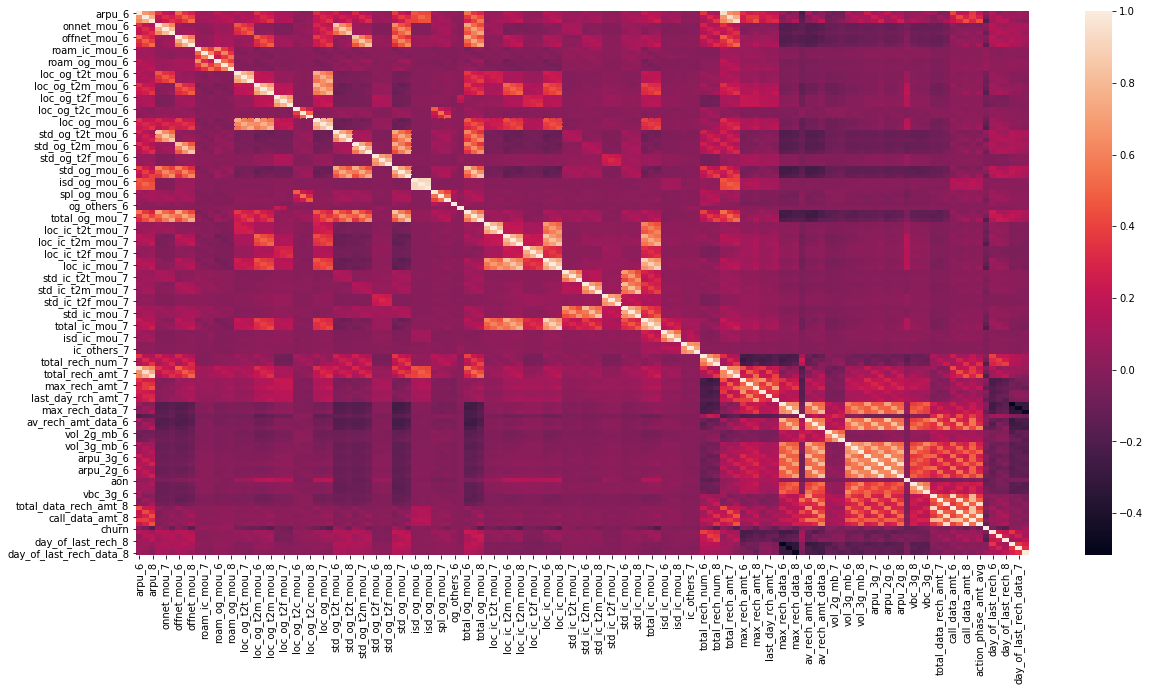

In [53]:
# Find correlation between numeric columns
plt.figure(figsize=(20,10))
sns.heatmap(tel_numerical_columns_df.corr())
plt.show()

<font size=4>Finding highly correlated columns</font>

In [54]:
# Create correlation matrix
corr_matrix = df_hvc.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
corr_columns = [column for column in upper.columns if any(upper[column] > 0.9)]
print('Corelated columns : \n {}'.format(corr_columns))

Corelated columns : 
 ['isd_og_mou_7', 'isd_og_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'call_data_amt_6', 'call_data_amt_7', 'call_data_amt_8', 'action_phase_amt_avg']


<font size=4>Dropping Correlated columns</font>

In [55]:
# Drop highly Correlated columns
df_hvc.drop(corr_columns, axis = 1, inplace = True)

In [56]:
# Analyse column types
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(df_hvc)

Total Numerical columns : 124
Total Categorical columns : 0


<font size=4>Create Master dataframe</font>

In [57]:
# Lets make a master dataframe after data cleaning step for data visualization
master_df=df_hvc

In [58]:
# Lets delete all previous dataframes to release memory
del df_hvc
del tel_numerical_columns_df
del tel_categorical_columns_df
del rawdata
del variance_df

In [59]:
# Lets have a look at dataset
master_df.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 3171.48        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
21  514.45  597.75  637.76       102.41       132.11        85.14   
23   74.35  193.90  366.97        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
21              1.58              0.00              0.00              0.00   
23              0.00              0.00              0.00             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00    

**Derived Variable**

    Age on Network(AON) Bins

In [60]:
#Create Derived variable through binning
master_df['aon_bin']=master_df['aon']/365
master_df['aon_bin'] = master_df['aon_bin'].astype(int)

In [61]:
master_numerical_df, master_categorical_df = column_type_analysis(master_df)

Total Numerical columns : 125
Total Categorical columns : 0


In [62]:
# Check the dataframe shape
nRow, nCol = master_df.shape
print("In master_df, there are ",nRow ,"rows and ",nCol," columns now")

In master_df, there are  30001 rows and  125  columns now


In [63]:
# Creating churn and non-churn dataframes
churn_df = master_df[master_df['churn'] == 1].copy()
non_churn_df = master_df[master_df['churn'] == 0].copy()

## Data Visualization

    Lets Visualize the dataset and handle outliers if found any
    
    As the number of variable in master dataframe is too large to lets check outliers with describe option

<font size='4'><b>Outliers Treatment</b><font>

In [64]:
master_df.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.00 30001.00 30001.00     30001.00     30001.00     30001.00   
mean    558.49   560.78   508.60       260.79       267.82       234.11   
std     460.64   479.78   501.96       459.64       479.99       458.45   
min   -2258.71 -2014.05  -945.81         0.00         0.00         0.00   
25%     309.87   309.83   231.47        17.08        16.03        10.39   
50%     481.69   480.94   427.58        84.58        82.81        65.61   
75%     699.94   698.32   661.49       290.44       290.24       239.96   
90%     994.10   995.86   977.35       754.16       784.48       665.08   
95%    1240.96  1261.27  1255.02      1135.44      1185.79      1074.59   
99%    1985.12  1999.50  1986.62      2151.74      2201.96      2159.11   
100%  27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   
max   27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30001.00      30001.00      30001.00       30001.00       30001.00   
mean         373.69        378.10        335.08          16.11          12.64   
std          482.52        498.92        482.06          76.30          75.79   
min            0.00          0.00          0.00           0.00           0.00   
25%           71.61         69.91         46.74           0.00           0.00   
50%          222.54        220.03        182.79           0.00           0.00   
75%          487.94        494.01        438.89           0.00           0.00   
90%          895.83        916.08        823.68          27.39          14.29   
95%         1256.61       1272.29       1167.54          84.54          55.64   
99%         2326.36       2410.89       2193.13         342.44         280.46   
100%        8362.36       9667.13      14007.34        2613.31        3813.29   
max         8362.36       9667.13      14007.34        2613.31        3813.29   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30001.00       30001.00       30001.00       30001.00   
mean           12.50          26.57          20.15          19.87   
std            74.13         116.21          96.10         104.72   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            15.01          50.43          31.09          28.88   
95%            56.35         145.41         104.24         100.51   
99%           282.19         530.71         438.59         427.03   
100%         4169.81        3775.11        2812.04        5337.04   
max          4169.81        3775.11        2812.04        5337.04   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30001.00          30001.00          30001.00          30001.00   
mean              84.48             85.67             78.08            163.24   
std              228.79            240.53            227.37            250.12   
min                0.00              0.00              0.00              0.00   
25%                4.38              4.61              2.53             19.21   
50%               24.33             24.68             20.73             77.18   
75%               77.98             78.34             72.04            208.93   
90%              187.93            190.84            178.84            419.48   
95%              322.74            324.39            298.78            604.38   
99%             1006.36           1018.53            913.33           1136.96   
100%            6431.33           7400.66          10752.56           4729.74   
max             6431.33           7400.66          10752.56           4729.74   

       loc_og_t2m_mou_7  l

<font> <b>Insights: </b></font>

    As we can see for almost all features, the differnce between 99 and 100 percentile is quite huge indicating presence of heavy outliers beyond 99 percentile.

    So we will cap the outliers for all the columns to 99 percentile. Capping means any value above the 99 cutoff value will be imputed with the same value

<font size=4> <b> Removing outliers using k-sigma technique </b></font>



In [65]:
# Function to Cap Outliers at 99 percentile
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

# Fetching all the numeric cols for outlier treatment
outliers_cols=master_df.select_dtypes(include=['float64','int64']).columns.tolist()

master_df[outliers_cols] = master_df[outliers_cols].apply(cap_outliers, axis=0)

master_df.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.00 30001.00 30001.00     30001.00     30001.00     30001.00   
mean    548.19   550.81   498.44       244.52       251.24       216.62   
std     356.62   361.12   384.49       371.62       387.61       354.67   
min    -823.43  -878.55  -945.81         0.00         0.00         0.00   
25%     309.87   309.83   231.47        17.08        16.03        10.39   
50%     481.69   480.94   427.58        84.58        82.81        65.61   
75%     699.94   698.32   661.49       290.44       290.24       239.96   
90%     994.10   995.86   977.35       754.16       784.48       665.08   
95%    1240.96  1261.27  1255.02      1135.44      1185.79      1074.59   
99%    1940.41  1999.50  1986.62      1639.73      1707.80      1609.46   
100%   1940.41  2000.11  2014.48      1639.73      1707.80      1609.46   
max    1940.41  2000.11  2014.48      1639.73      1707.80      1609.46   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30001.00      30001.00      30001.00       30001.00       30001.00   
mean         358.67        362.07        319.43          12.32           9.18   
std          405.25        413.55        386.60          41.75          35.65   
min            0.00          0.00          0.00           0.00           0.00   
25%           71.61         69.91         46.74           0.00           0.00   
50%          222.54        220.03        182.79           0.00           0.00   
75%          487.94        494.01        438.89           0.00           0.00   
90%          895.83        916.08        823.68          27.39          14.29   
95%         1256.61       1272.29       1167.54          84.54          55.64   
99%         1821.26       1874.87       1781.26         245.02         240.00   
100%        1821.26       1874.87       1781.26         245.02         240.00   
max         1821.26       1874.87       1781.26         245.02         240.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30001.00       30001.00       30001.00       30001.00   
mean            9.22          20.59          14.99          14.90   
std            35.30          66.90          52.51          53.59   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            15.01          50.43          31.09          28.88   
95%            56.35         145.41         104.24         100.51   
99%           234.88         375.19         308.45         334.02   
100%          234.88         375.19         308.45         334.02   
max           234.88         375.19         308.45         334.02   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30001.00          30001.00          30001.00          30001.00   
mean              73.43             74.17             67.99            154.59   
std              133.71            136.28            126.69            199.75   
min                0.00              0.00              0.00              0.00   
25%                4.38              4.61              2.53             19.21   
50%               24.33             24.68             20.73             77.18   
75%               77.98             78.34             72.04            208.93   
90%              187.93            190.84            178.84            419.48   
95%              322.74            324.39            298.78            604.38   
99%              770.87            807.25            760.20            913.59   
100%             770.87            807.25            760.20            913.59   
max              770.87            807.25            760.20            913.59   

       loc_og_t2m_mou_7  l

<font size=4><b>Insights:</b></font>

    Now we can see there are no outliers as maximum values in each columns are capped near to 99 percentile values.
    

## Exploratory Data Analysis

    The goal of EDA is to determine what our data can tell us!!! In this section, we make plots and find patterns, relationships etc.

    We will start with our target variable i.e. 'churn'

    Let's start

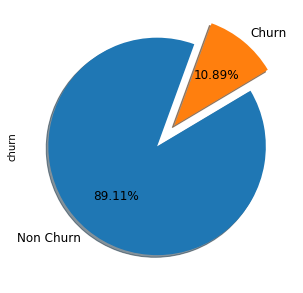

In [66]:
# Plot churn vs Non Churn distribution percentage
plt.figure(figsize = (10,5))
labels ="Non Churn", "Churn"

master_df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, fontsize=12, startangle=70)
plt.show()

### Univariate Analysis

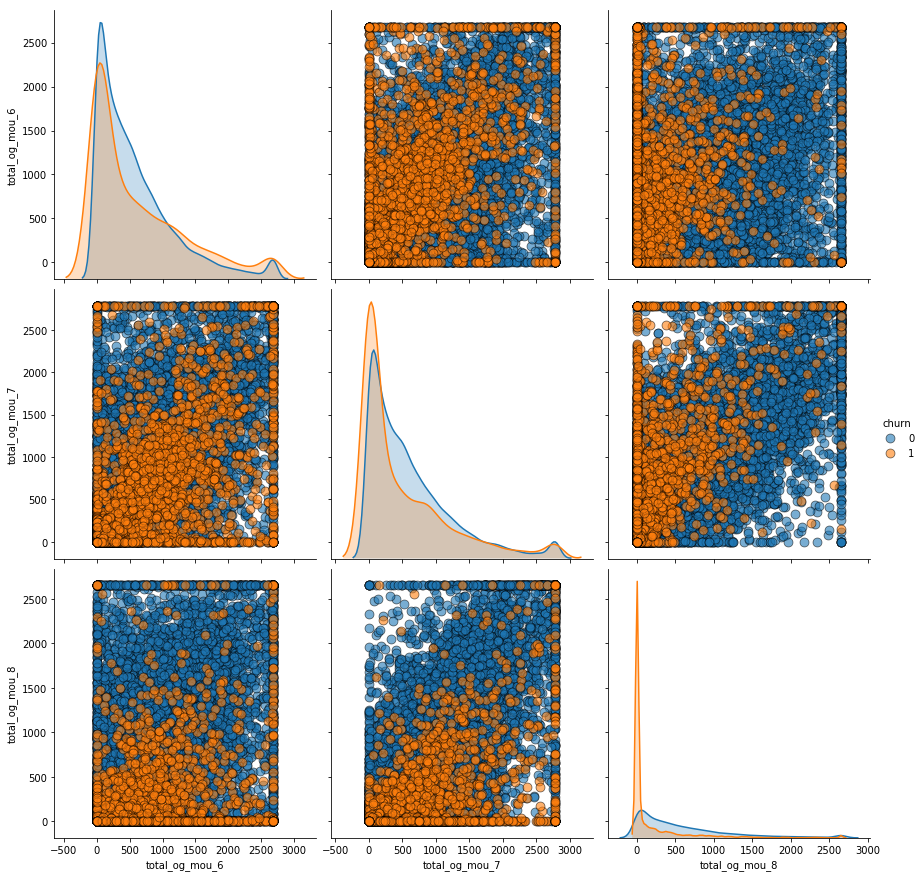

In [67]:
sns.pairplot(master_df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

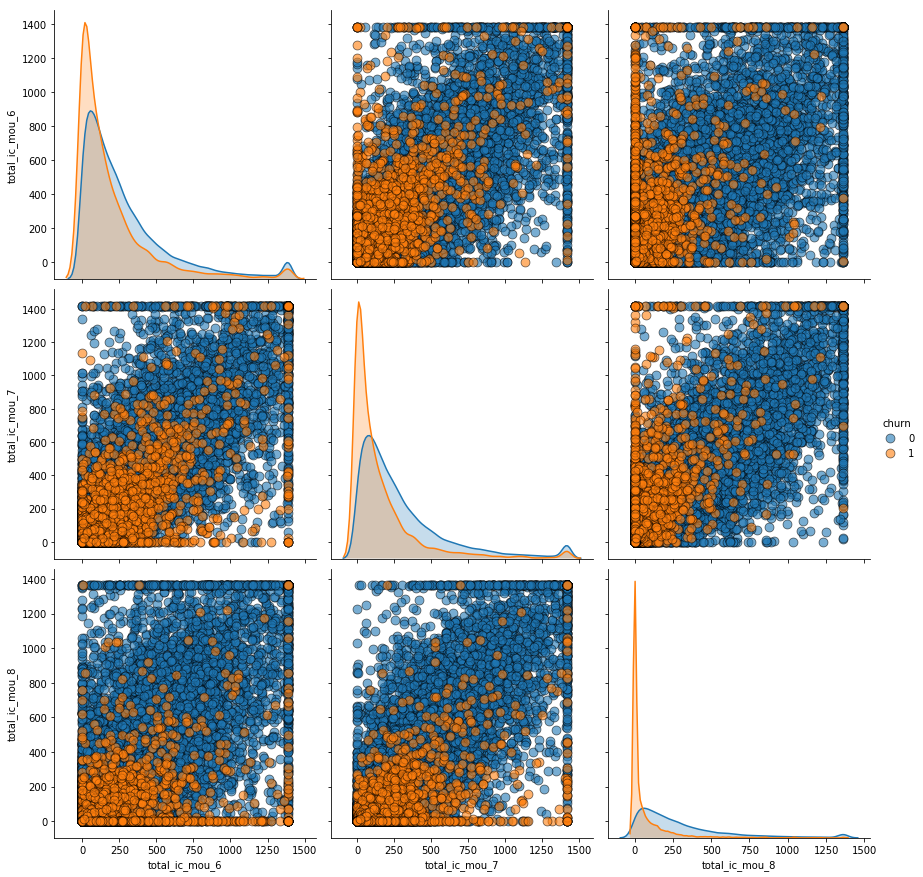

In [68]:
sns.pairplot(master_df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

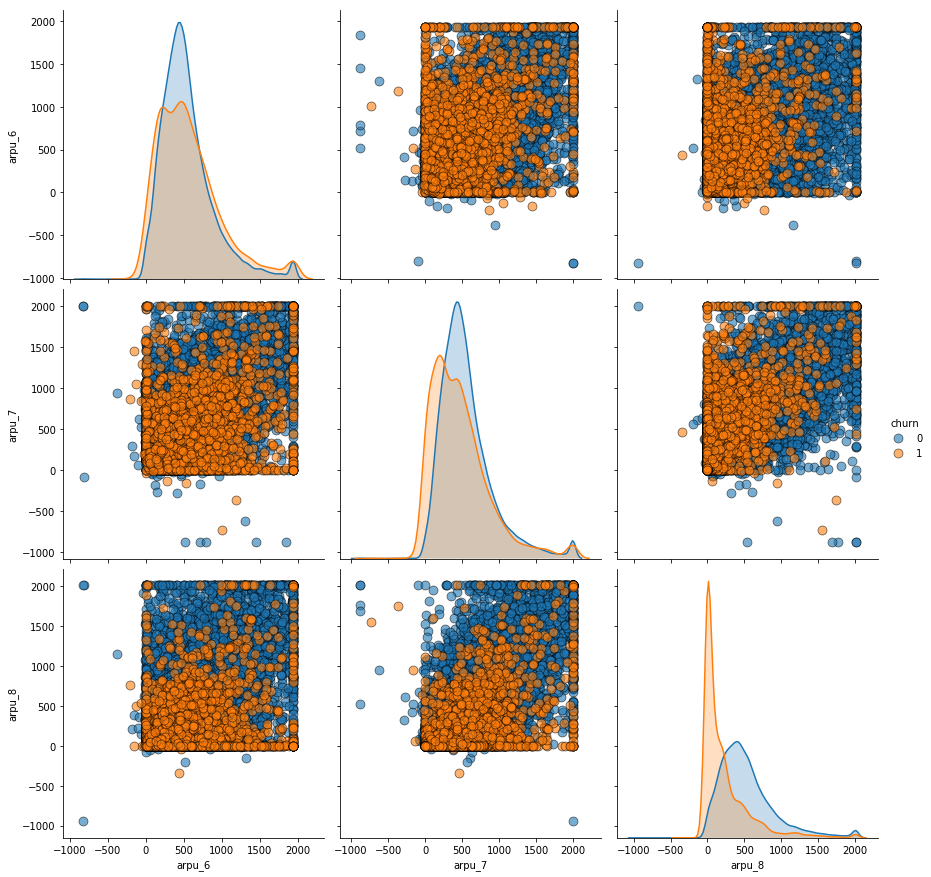

In [69]:
# Plot colored by arpu vs churn
sns.pairplot(master_df, 
             vars = ['arpu_6', 'arpu_7', 'arpu_8'], 
             hue = 'churn', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

<font size=4>Insights:</font>

        Average Revenue per user doesn't look good in Action Phase(8th month) as compared with Good Phase (6th and 7th Months). Non Churn customers distribution looks lesser.

In [70]:
# Function to draw scatter plot
def draw_scatter_plot(df, X, Y, xlabel, ylabel, width=5, height=5, xLblRotation=0, title=None, colors=(0,0,0), alpha=0.5):

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    area = np.pi*3
    plt.scatter(x=X, y=Y, data=df, s=area, c=colors, alpha=alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xLblRotation)
    plt.title(title)
    plt.show()

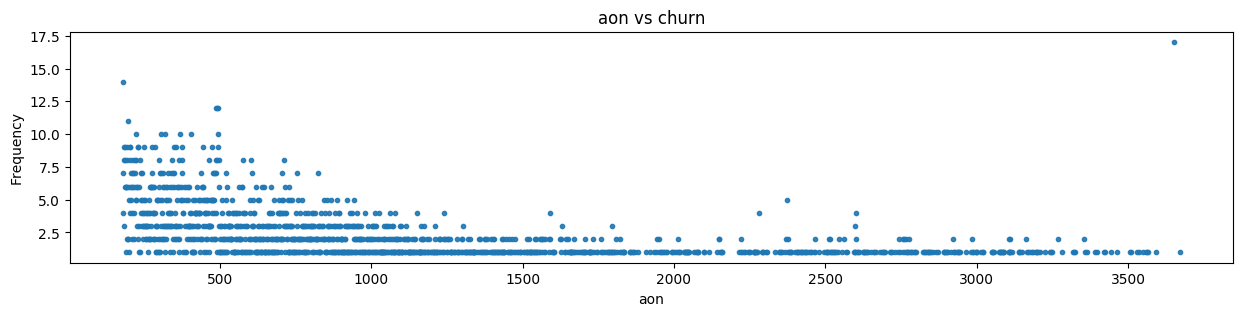

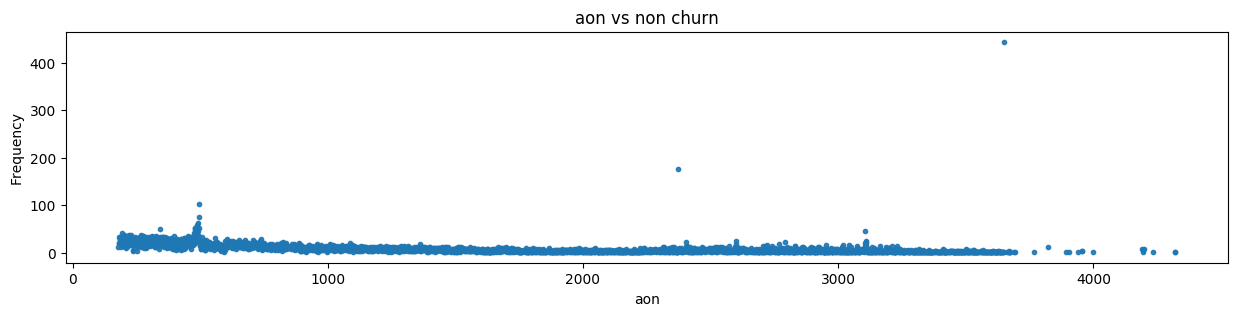

In [71]:
churn_aon_freq = churn_df.groupby(churn_df.aon).size().reset_index(name='Frequency')
non_churn_aon_freq = non_churn_df.groupby(non_churn_df.aon).size().reset_index(name='Frequency')

draw_scatter_plot(churn_aon_freq, "aon", "Frequency", "aon", "Frequency", 15, 3, 0,  'aon vs churn', None, 0.9)
draw_scatter_plot(non_churn_aon_freq, "aon", "Frequency", "aon", "Frequency", 15, 3, 0, 'aon vs non churn', None, 0.9)

<font size=4>Insights:</font>
    
    From above plots, we can see that for churned customers, AON is significantly less than non-churned customer
    

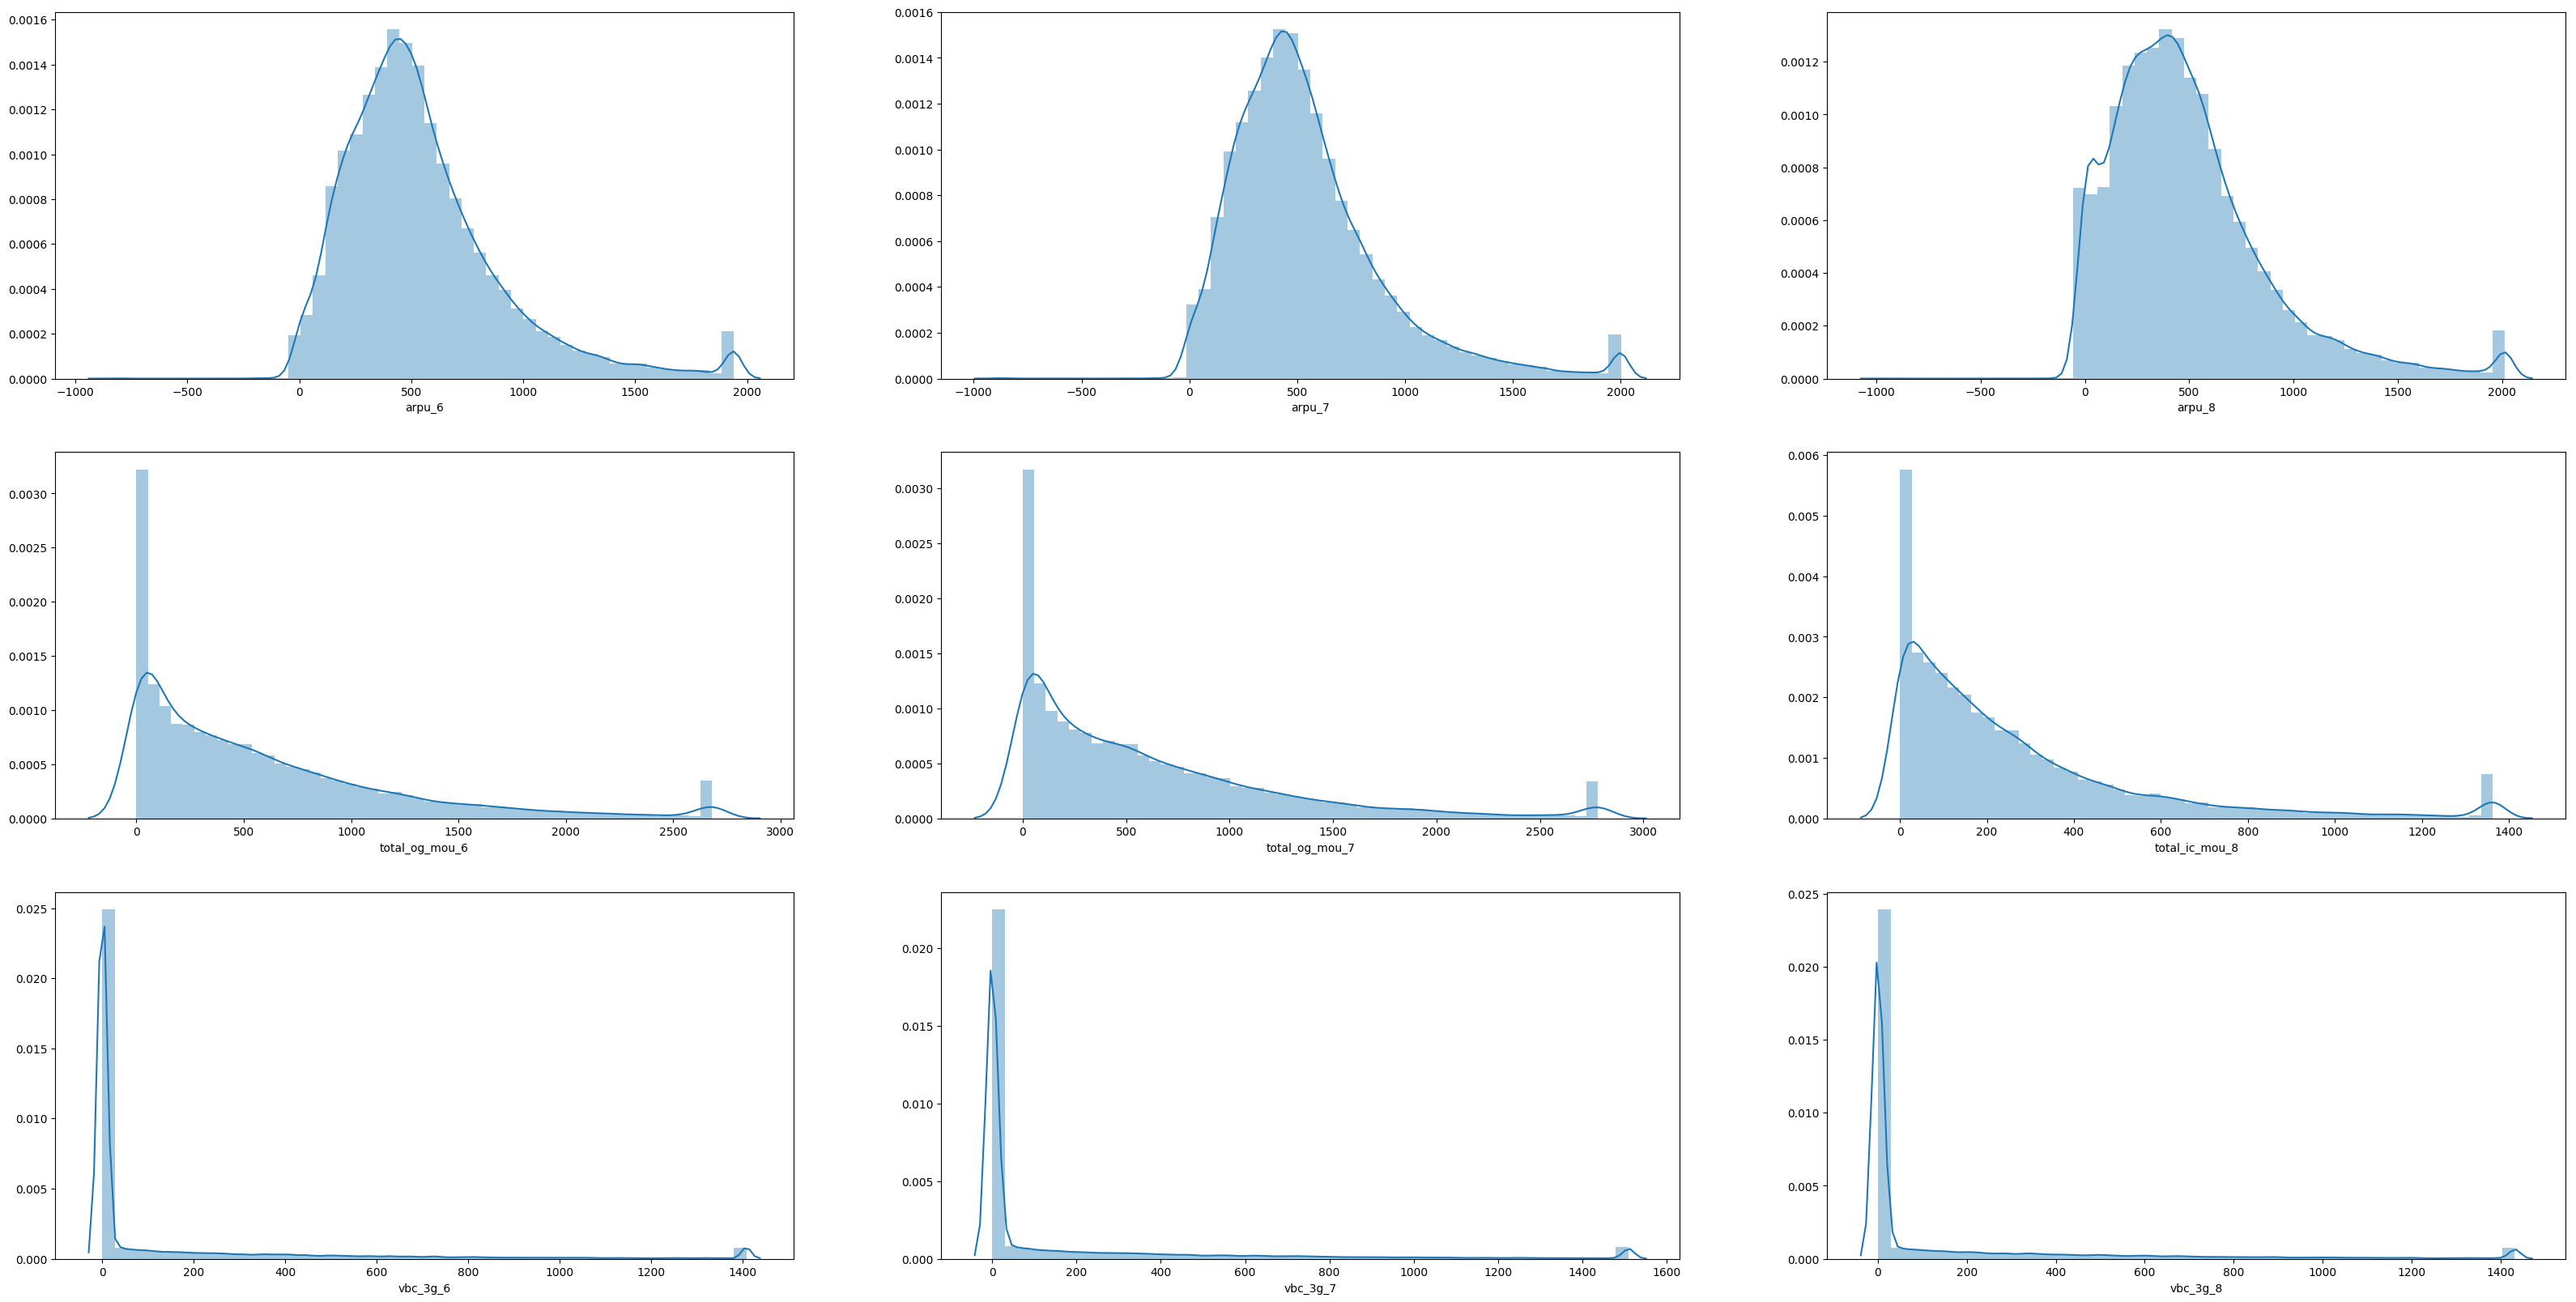

In [72]:
# Creating distplots to see few important attributes pattern
plt.subplots(figsize=(40,20))

plt.subplot(3, 3, 1)
sns.distplot(master_df.arpu_6)

plt.subplot(3, 3, 2)
sns.distplot(master_df.arpu_7)

plt.subplot(3, 3, 3)
sns.distplot(master_df.arpu_8)

plt.subplot(3, 3, 4)
sns.distplot(master_df.total_og_mou_6)

plt.subplot(3, 3, 5)
sns.distplot(master_df.total_og_mou_7)

plt.subplot(3, 3, 6)
sns.distplot(master_df.total_ic_mou_8)

plt.subplot(3, 3, 7)
sns.distplot(master_df.vbc_3g_6)

plt.subplot(3, 3, 8)
sns.distplot(master_df.vbc_3g_7)

plt.subplot(3, 3, 9)
sns.distplot(master_df.vbc_3g_8)

plt.show()

<font size=4>Day of last recharge June </font>

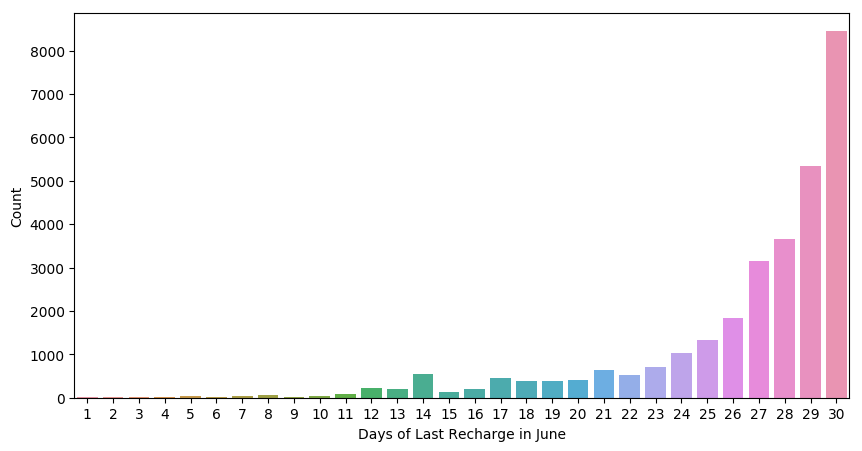

In [73]:
plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_6", data=master_df)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Count')
plt.show()

<font size=4>Day of last recharge July </font>

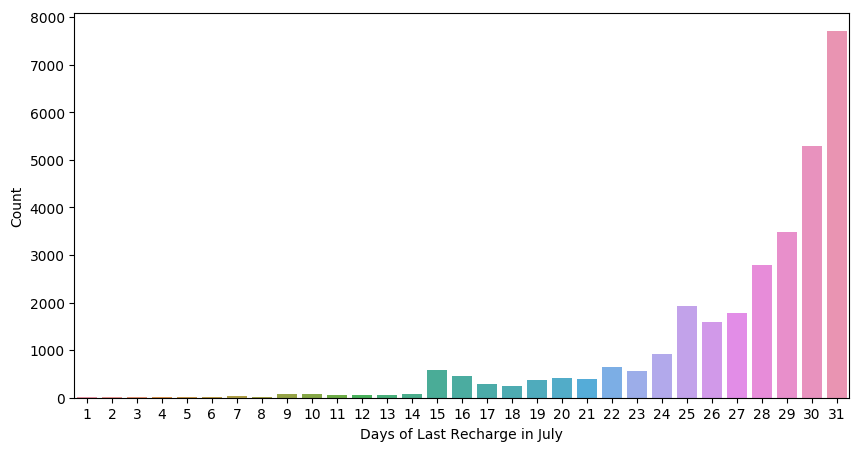

In [74]:
plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_7", data=master_df)
plt.xlabel('Days of Last Recharge in July')
plt.ylabel('Count')
plt.show()

<font size=4>Day of last recharge August </font>

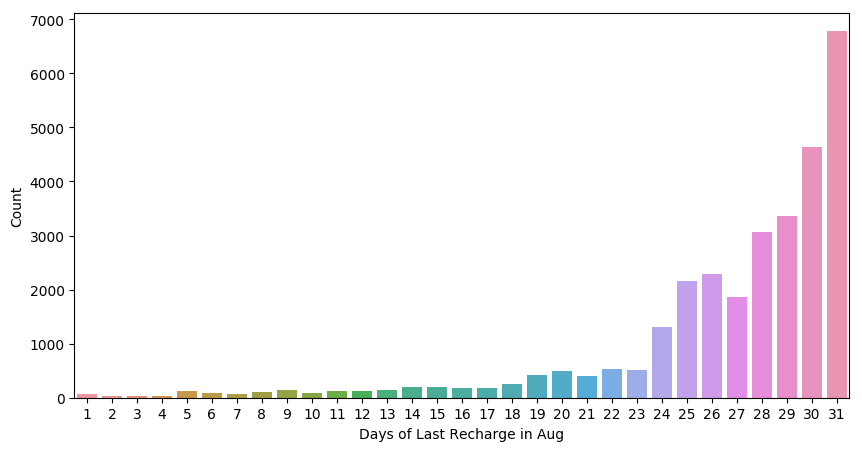

In [75]:

plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_8", data=master_df)
plt.xlabel('Days of Last Recharge in Aug')
plt.ylabel('Count')
plt.show()

<font size=4>Insights:</font>
    
    Sudden increase of last day recharge on last day of June, July and Aug months respectively is due to imputing date columns missing values last date by default.
    
    But, For other days, Customers mostly go for recharge in last week of every month
    
    If some freebies offered like extra 100 minutes free calls or 3GB free data, then it will be helpful in retaining the customers

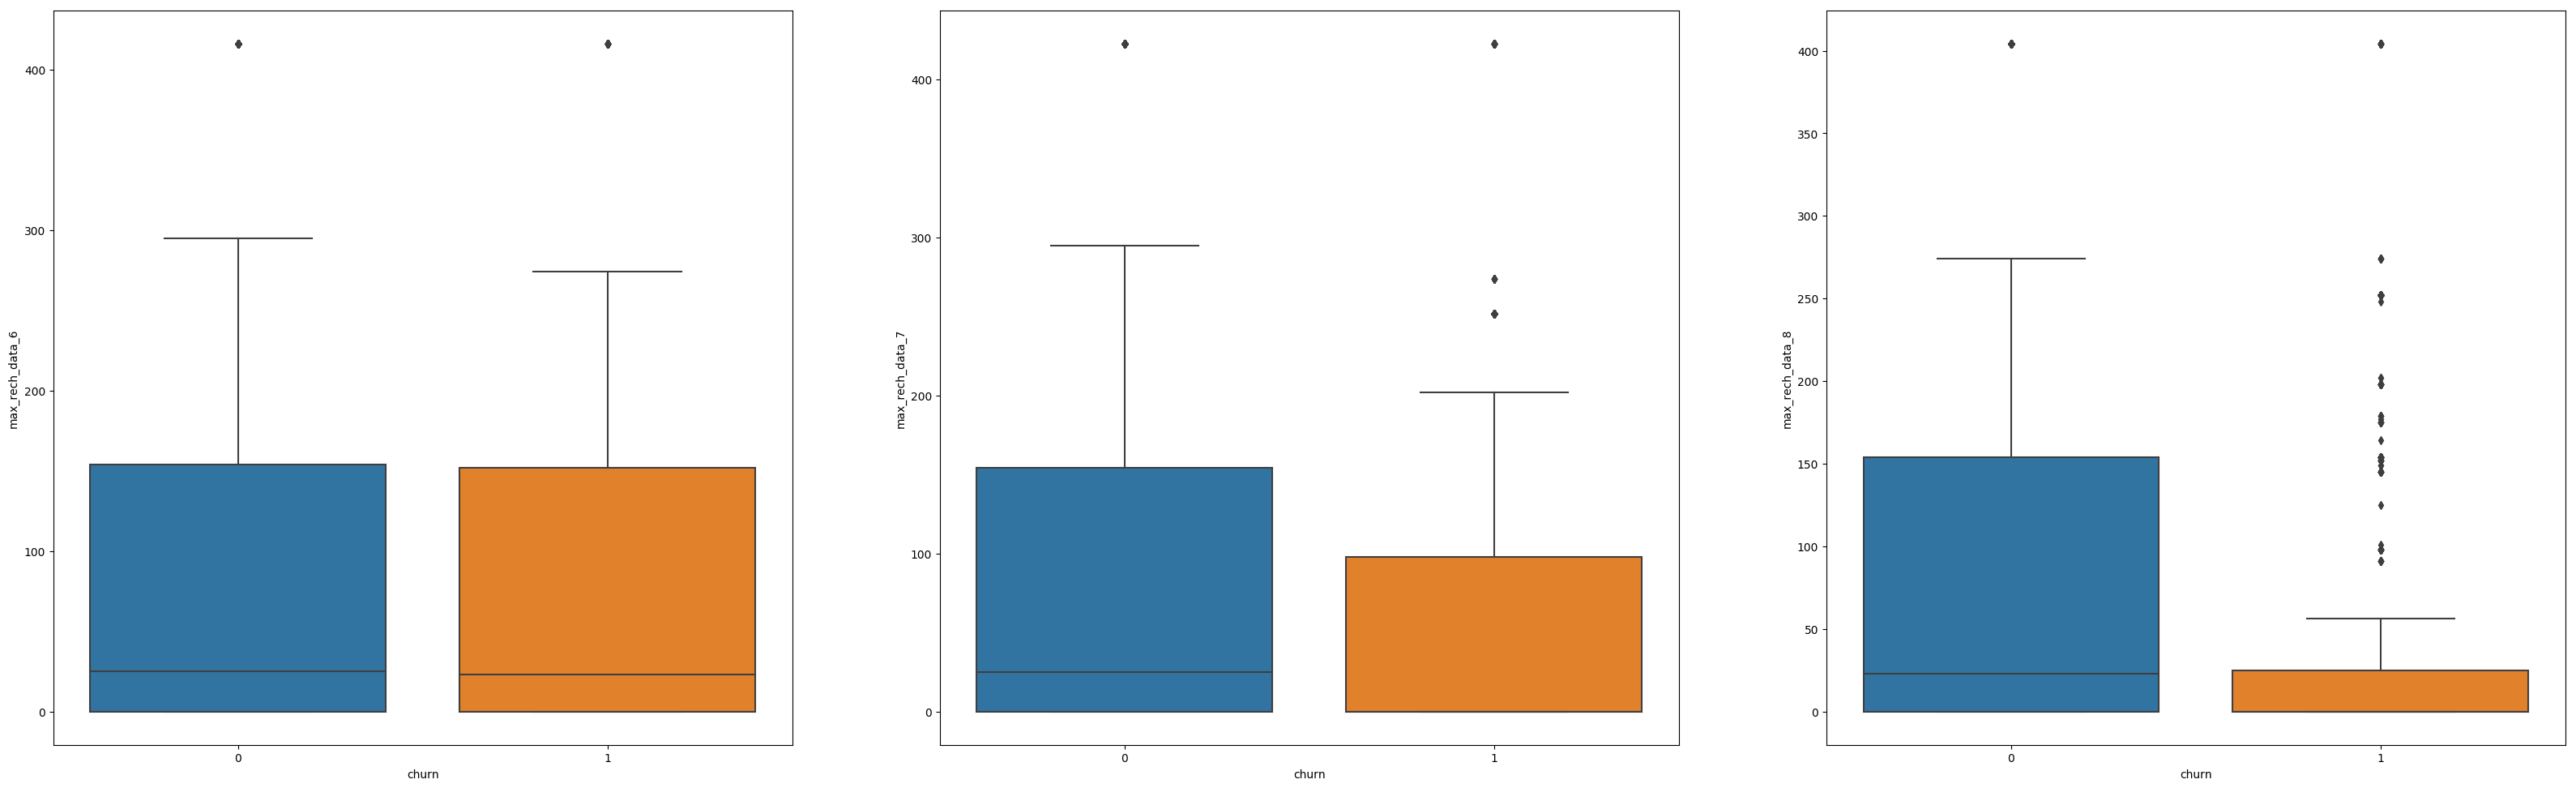

In [76]:
# Max_rech_data features plotting
plt.subplots(figsize=(40,40))

plt.subplot(3,3,1)
sns.boxplot(x='churn', y='max_rech_data_6', data = master_df)

plt.subplot(3,3,2)
sns.boxplot(x='churn', y='max_rech_data_7', data = master_df)

plt.subplot(3,3,3)
sns.boxplot(x='churn', y='max_rech_data_8', data = master_df)


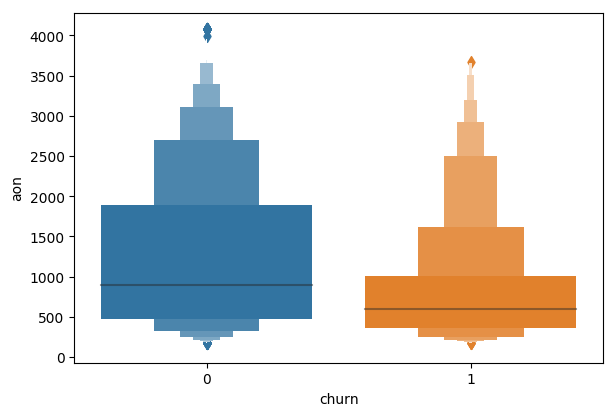

In [77]:
# count_rech_3g features plotting
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxenplot(x='churn', y='aon', data = master_df)

<font size=4> <b> Insights: </b> </font>

    From above plots, we can see that for churned customers, AON is significantly less than non-churned customer

In [78]:
def plot_avg_call_per_month_vs_aon(pltType,data,calltype,col):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with col features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[col].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
  
    plt.show()

### Segmented Univariate Analysis

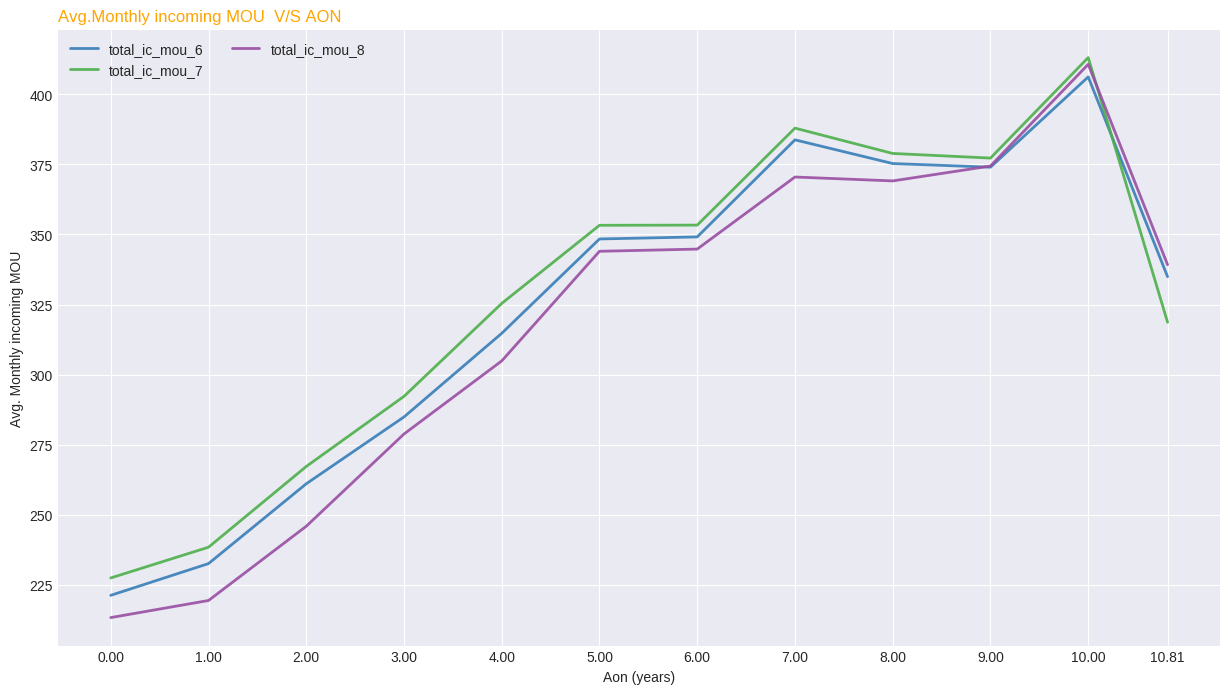

In [79]:
# Plotting Avg. total monthly incoming MOU vs AON
incoming_cal_columns = master_df.filter(regex ='total_ic_mou').columns

plot_avg_call_per_month_vs_aon('multi',master_df,calltype='incoming',col=incoming_cal_columns)

<font size=4> Insights </font>

    Customers Average monthly incoming calls usage increases if they choose to stay with same subscriber for longer time. 
    
    Incoming calls usage in good phase is better than action phase

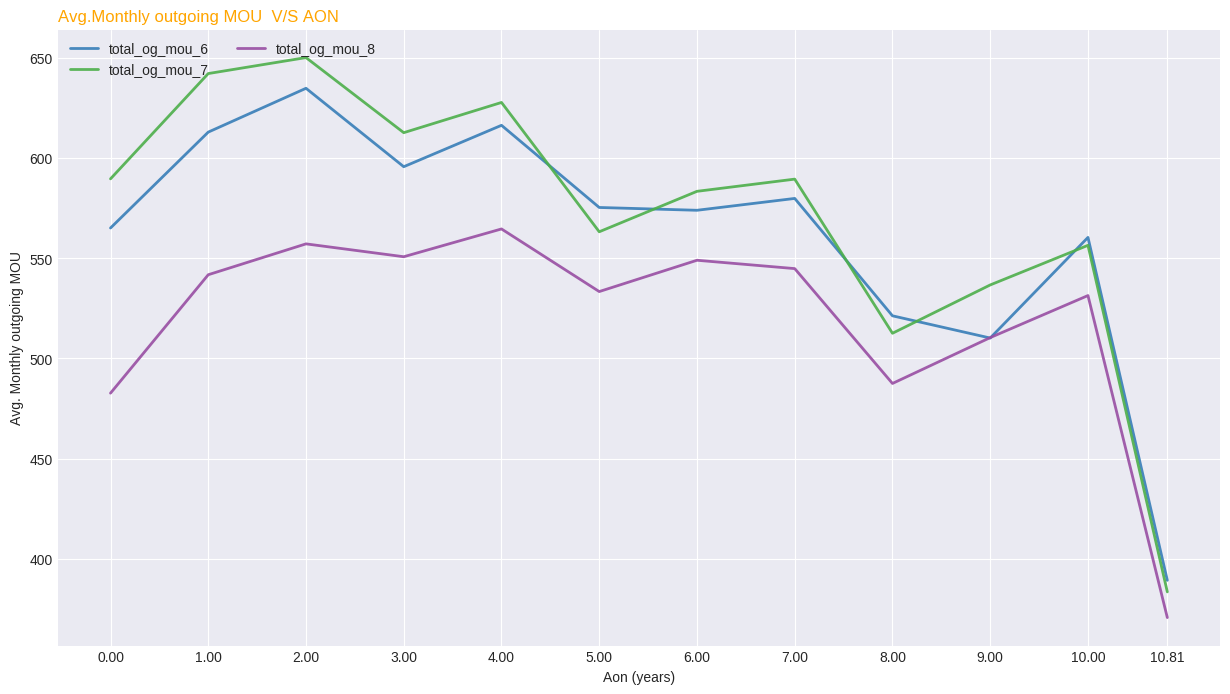

In [80]:
# Plotting Avg. total monthly outgoing MOU vs AON
outgoing_cal_columns = master_df.filter(regex ='total_og_mou').columns

plot_avg_call_per_month_vs_aon('multi',master_df,calltype='outgoing',col=outgoing_cal_columns)

<font size=4> Insights </font>

    Customers Average monthly outgoing calls usage is comparatively very low in action phase than good phase for those whose Age on Network is less than 3 years
    
    Customers average outgoing mou pattern having AON more than 10 years are almost same in good phase and action phase

### Bivariate Analysis

<font size=4> Day of Last Recharge - June </font>

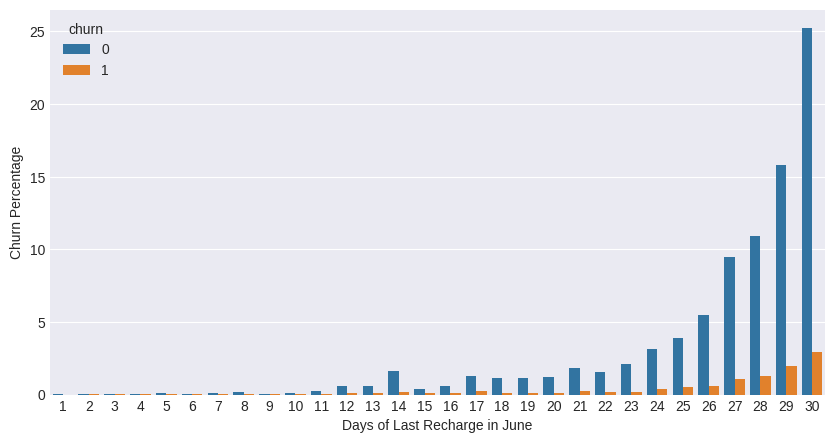

In [81]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_6", y="churn", hue="churn", data=master_df,
            estimator=lambda x: len(x) / len(master_df) * 100)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Churn Percentage')
plt.show()

<font size=4> Day of last Recharge - July </font>

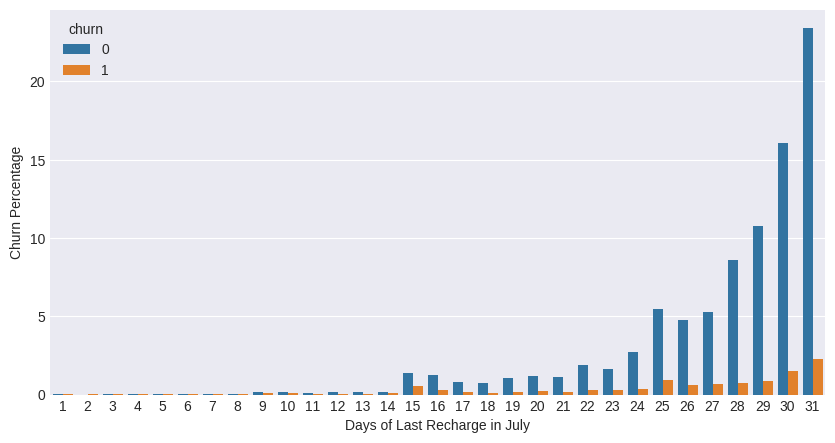

In [82]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_7", y="churn", hue="churn", data=master_df,
            estimator=lambda x: len(x) / len(master_df) * 100)
plt.xlabel('Days of Last Recharge in July')
plt.ylabel('Churn Percentage')
plt.show()

<font size=4> Day of last Recharge - Aug </font>

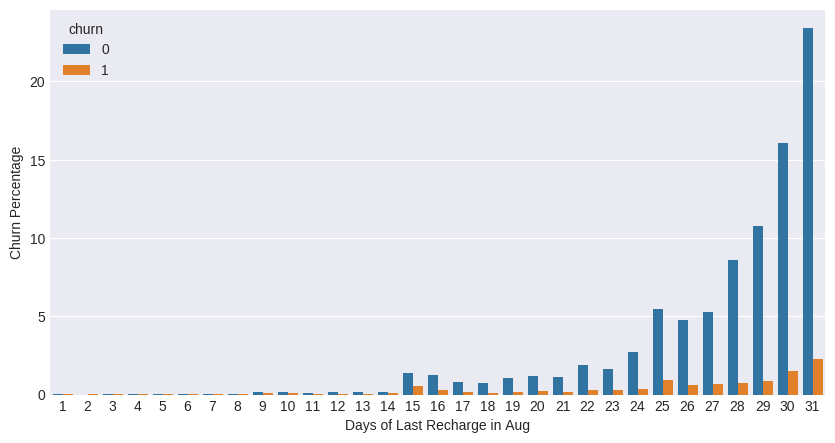

In [83]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_7", y="churn", hue="churn", data=master_df,
            estimator=lambda x: len(x) / len(master_df) * 100)
plt.xlabel('Days of Last Recharge in Aug')
plt.ylabel('Churn Percentage')
plt.show()

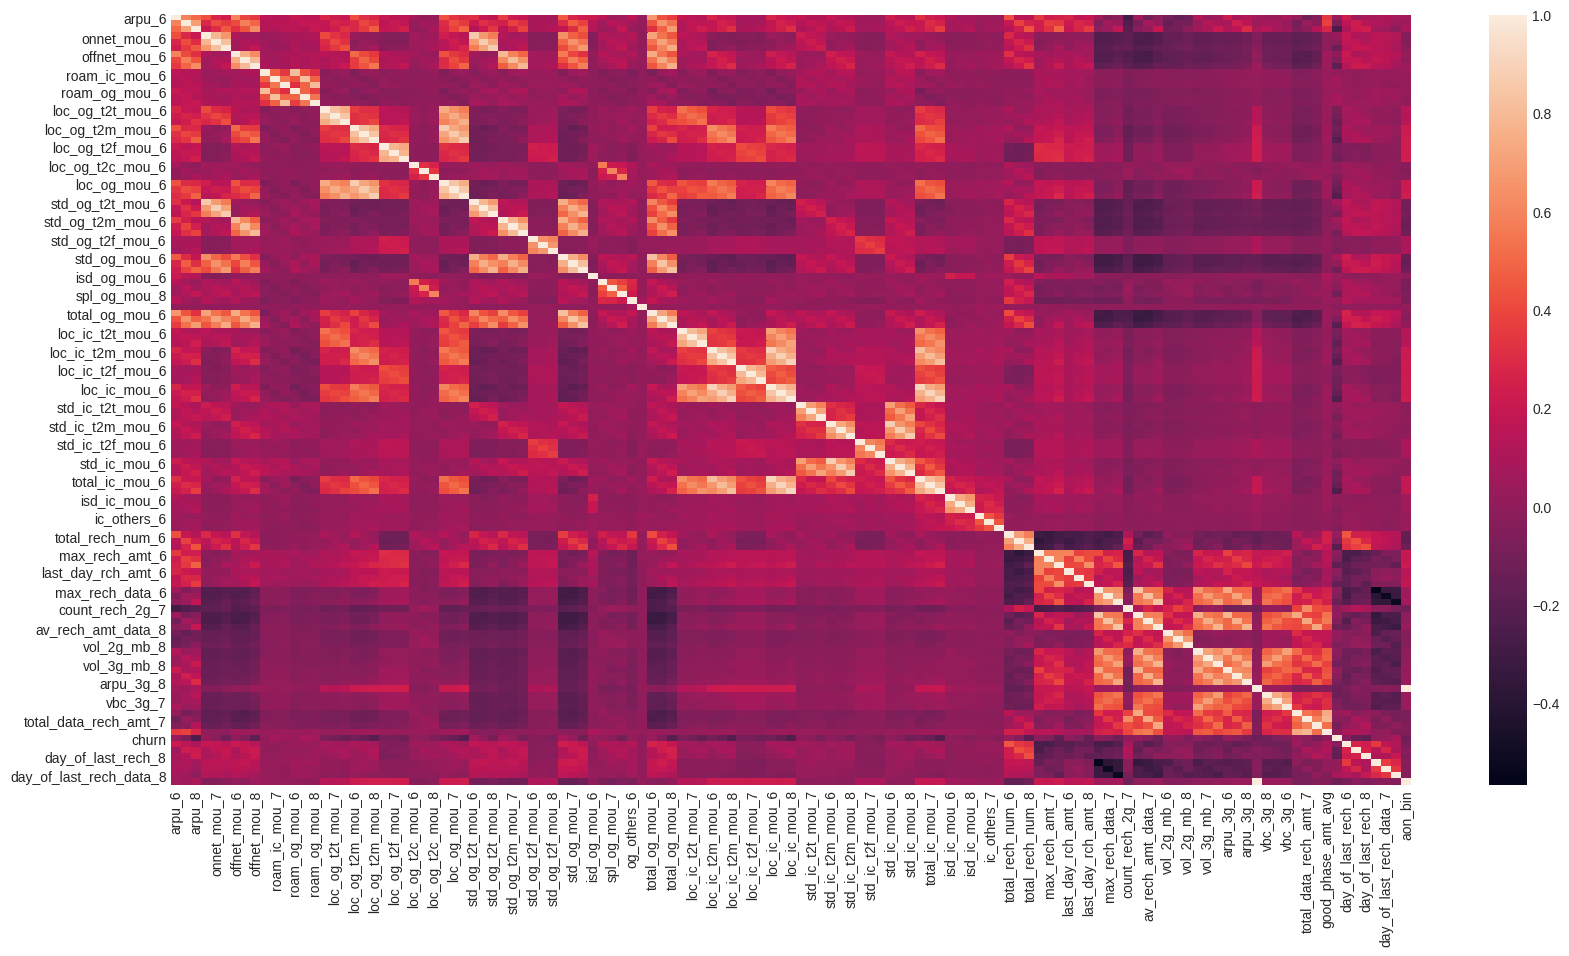

In [84]:
# Find correlation between columns
plt.figure(figsize=(20,10))
sns.heatmap(master_df.corr())
plt.show()

# Step 2 : Modelling

## Data Preparation for Models

### Dividing Training data into X and Y sets for model building

In [85]:
X = master_df[master_df.columns[~master_df.columns.isin(['churn'])]]
y = master_df['churn']

In [86]:
# Count the number of features
features = list(X.columns)
print('Total features : {}'.format(len(features)))

Total features : 124


### Splitting data into Training and Testing Sets

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 100)

print('Shape of training data : {}'.format(X_train.shape))
print('Percentage of churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 1]),len(y_train))))
print('Percentage of non-churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 0]),len(y_train))))
print('\n')
print('Shape of test data : {}'.format(X_test.shape))
print('Percentage of churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 1]),len(y_test))))
print('Percentage of non-churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 0]),len(y_test))))

Shape of training data : (21000, 124)
Percentage of churn rows in training data : 10.87
Percentage of non-churn rows in training data : 89.13


Shape of test data : (9001, 124)
Percentage of churn rows in test data : 10.93
Percentage of non-churn rows in test data : 89.07


<font size=4>What is an Imbalanced data?</font>

    - Imbalance means that the number of data points available for the classes is different. Let's say if there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In [88]:
# Function to perform data balancing
def perform_smote(X_train, y_train):
    sm = SMOTE(random_state = 100)
    X_smote, y_smote = sm.fit_sample(X_train, y_train)
    
    X_train_smote = pd.DataFrame(X_smote, columns = X_train.columns)
    y_train_smote = pd.Series(y_smote)
    
    print('After SMOTE, number of values per class in training data : \n {} \n'
          .format(y_train_smote.value_counts()))
    
    return X_train_smote, y_train_smote


In [89]:
# Balancing train dataset
X_train_smote, y_train_smote = perform_smote(X_train, y_train)

After SMOTE, number of values per class in training data : 
 1    18718
0    18718
Name: churn, dtype: int64 



In [90]:
# Functions to do standard scaling and performing PCA on it
def standard_scaling(X_train, X_test):
    scaler = StandardScaler()
    # Perform Fit and Transform on Training Data
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

    # Perform only Transform on Test Data
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
    return X_train_scaled, X_test_scaled

# Perform PCA
def perform_pca(X_train, X_test, scaled = False, incremental_pca = False, n_components = 60):
    if incremental_pca:
        pca = IncrementalPCA(n_components = n_components)
    else:
        pca = PCA(svd_solver='randomized', random_state = 100)
    
    if scaled:
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
    else:
        X_train_scaled, X_test_scaled = standard_scaling(X_train, X_test)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return pca, X_train_pca, X_test_pca

In [91]:
# Function to Summarize Model
def summarize_model(y_true, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print('False Positive Rate : {}'.format(false_positive_rate))
    print('True Positive Rate : {}'.format(true_positive_rate))
    print('Thresholds : {}'.format(thresholds))
    print('ROC AUC Score : {}'.format(roc_auc))
    print('Accuracy Score : {}'.format(accuracy_score(y_true, y_pred)))
    print('Precision Score : {}'.format(precision_score(y_true, y_pred)))
    print('Recall Score : {}'.format(recall_score(y_true, y_pred)))
    print('F1 Score : {}'.format(f1_score(y_true, y_pred)))
    print('Confusion Matrix : \n {}'.format(confusion_matrix(y_true, y_pred)))
    print('Classification Report : \n {}'.format(classification_report(y_true, y_pred)))
    
    plt.figure(figsize=(6, 6))
    plt.plot( false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Model Building

<font size=4> <b> PCA </b> </font>

    n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

    It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

    Using PCA on our data will decrease the amount of operations during training and testing


In [92]:
from sklearn.decomposition import PCA, IncrementalPCA 

# Lets initialize PCA
default_incremental_pca = IncrementalPCA()

## Logistic Regression 

    Default Data

    Without PCA

False Positive Rate : [0.         0.01733816 1.        ]
True Positive Rate : [0.         0.33333333 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6579975884578603
Accuracy Score : 0.9116764803910676
Precision Score : 0.702355460385439
Recall Score : 0.3333333333333333
F1 Score : 0.45210199862164024
Confusion Matrix : 
 [[7878  139]
 [ 656  328]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8017
           1       0.70      0.33      0.45       984

    accuracy                           0.91      9001
   macro avg       0.81      0.66      0.70      9001
weighted avg       0.90      0.91      0.90      9001



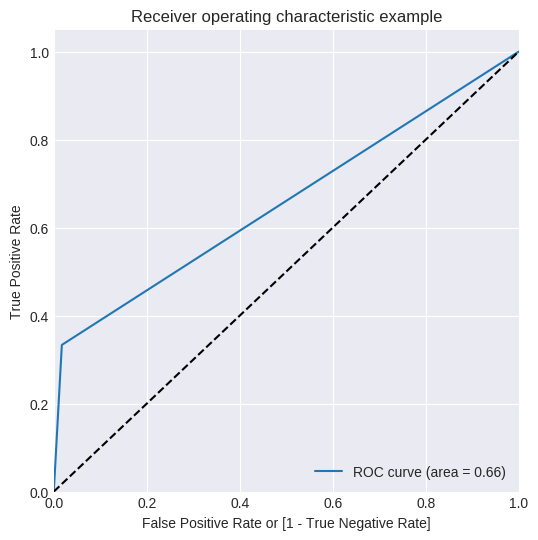

In [93]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

log_reg_default_model = LogisticRegression()
log_reg_default_model.fit(X_train, y_train)

y_pred_log_reg_default = log_reg_default_model.predict(X_test)

summarize_model(y_test, y_pred_log_reg_default)

    Default Data

    With PCA

False Positive Rate : [0.         0.02033179 1.        ]
True Positive Rate : [0.         0.37195122 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6758097122882168
Accuracy Score : 0.9132318631263193
Precision Score : 0.6918714555765595
Recall Score : 0.3719512195121951
F1 Score : 0.4838070059484468
Confusion Matrix : 
 [[7854  163]
 [ 618  366]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      8017
           1       0.69      0.37      0.48       984

    accuracy                           0.91      9001
   macro avg       0.81      0.68      0.72      9001
weighted avg       0.90      0.91      0.90      9001



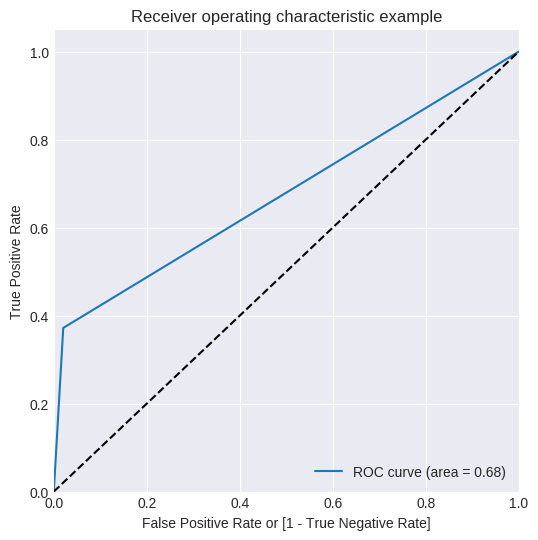

In [94]:
log_reg_default_pca, X_train_log_reg_default_pca, X_test_log_reg_default_pca = perform_pca(X_train, X_test)

log_reg_default_pca_model = LogisticRegression()
log_reg_default_pca_model.fit(X_train_log_reg_default_pca, y_train)

y_pred_log_reg_pca_default = log_reg_default_pca_model.predict(X_test_log_reg_default_pca)

summarize_model(y_test, y_pred_log_reg_pca_default)

<font size=4>Logistic Regression</font>  

    SMOTE Data
    Without PCA

False Positive Rate : [0.         0.19271548 1.        ]
True Positive Rate : [0.         0.81707317 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8121788455629348
Accuracy Score : 0.8083546272636374
Precision Score : 0.34227330779054915
Recall Score : 0.8170731707317073
F1 Score : 0.48244824482448234
Confusion Matrix : 
 [[6472 1545]
 [ 180  804]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      8017
           1       0.34      0.82      0.48       984

    accuracy                           0.81      9001
   macro avg       0.66      0.81      0.68      9001
weighted avg       0.90      0.81      0.84      9001



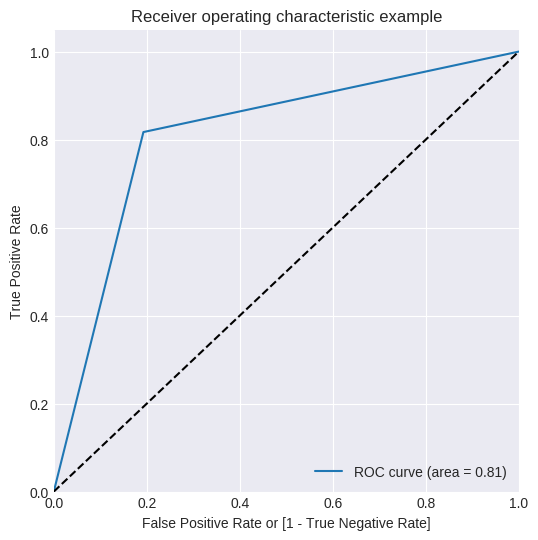

In [95]:
log_reg_smote_default_model = LogisticRegression()
log_reg_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_log_reg_smote_default = log_reg_smote_default_model.predict(X_test)

summarize_model(y_test, y_pred_log_reg_smote_default)

    SMOTE Data

    With PCA

False Positive Rate : [0.        0.1681427 1.       ]
True Positive Rate : [0.         0.80589431 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8188758060868622
Accuracy Score : 0.8290189978891235
Precision Score : 0.37038766931340494
Recall Score : 0.8058943089430894
F1 Score : 0.50752
Confusion Matrix : 
 [[6669 1348]
 [ 191  793]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      8017
           1       0.37      0.81      0.51       984

    accuracy                           0.83      9001
   macro avg       0.67      0.82      0.70      9001
weighted avg       0.91      0.83      0.85      9001



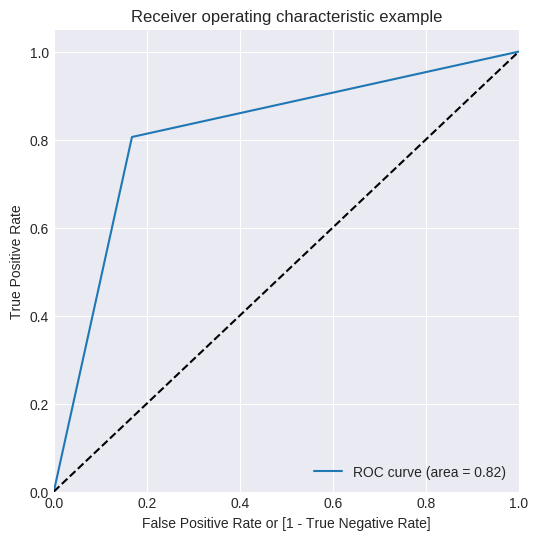

In [96]:
log_reg_smote_default_pca,\
X_train_log_reg_smote_default_pca, X_test_log_reg_smote_default_pca = perform_pca(X_train_smote, X_test)

log_reg_smote_default_pca_model = LogisticRegression()
log_reg_smote_default_pca_model.fit(X_train_log_reg_smote_default_pca, y_train_smote)

y_pred_log_reg_smote_default_pca = log_reg_smote_default_pca_model.predict(X_test_log_reg_smote_default_pca)

summarize_model(y_test, y_pred_log_reg_smote_default_pca)

<font size=4>Insights:</font>

    From with and without class imbalance handling techniques, we can see smote data with PCA has better Recall and other parameters. 
    
    So, Choosing SMOTE data with PCA for hyperparameter tuning for performance gains

**Plotting Principal Components chart**

In [97]:
# Function to plot principal Components:
def pca_3D_plot(ax, X_train_pca, y_train, title):
    ax.scatter(X_train_pca[:,2], X_train_pca[:,0], X_train_pca[:,1], c=y_train.map({0:'blue',1:'orange'}))
    ax.set_title(title)
    ax.set_xlabel('Principal Component 3')
    ax.set_ylabel('Principal Component 1')
    ax.set_zlabel('Principal Component 2')

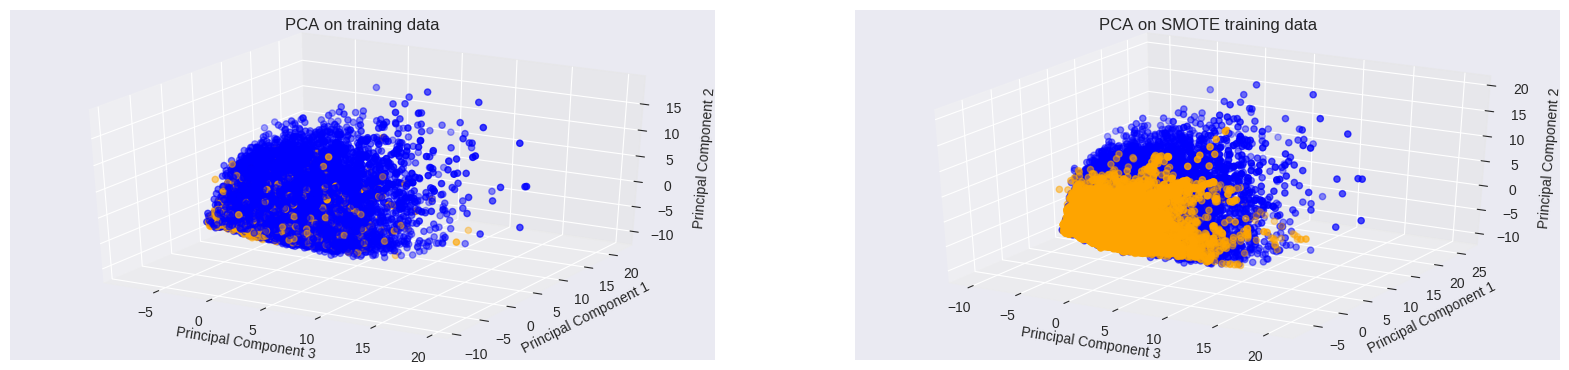

In [98]:
# Plot Principal Components 3D Diagram
fig = plt.figure(figsize=(20,10))

pca_ax1 = fig.add_subplot(2, 2, 1, projection='3d')
pca_3D_plot(pca_ax1, X_train_log_reg_default_pca, y_train,'PCA on training data')

pca_ax2 = fig.add_subplot(2, 2, 2, projection='3d')
pca_3D_plot(pca_ax2, X_train_log_reg_smote_default_pca, y_train_smote, 'PCA on SMOTE training data')

plt.show()

**Scree Plots**

In [99]:
def cumulative_explained_variance_plot(subplot, title, pca):
    subplot.set_xlabel('Principal Component')
    subplot.set_ylabel('Cumulative Explained Variance')
    subplot.set_title(title)
    subplot.plot(np.cumsum(log_reg_default_pca.explained_variance_ratio_))

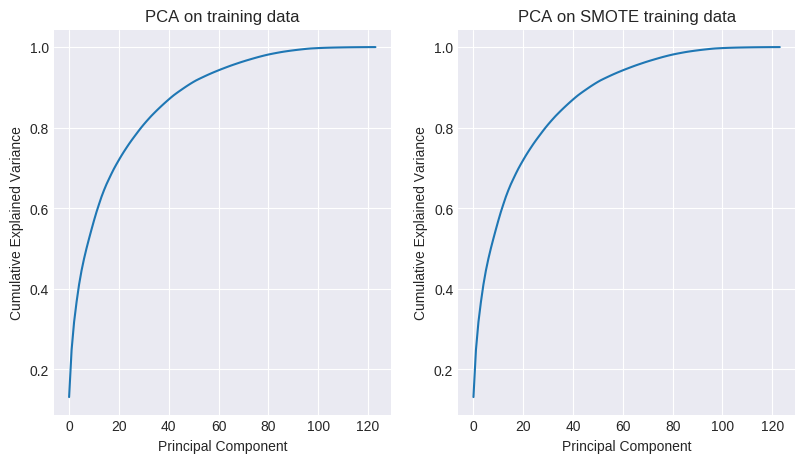

In [100]:
# Draw Scree Plot

fig = plt.figure(figsize = (20,5))

pca_subplot1 = fig.add_subplot(141)
cumulative_explained_variance_plot(pca_subplot1, 'PCA on training data', log_reg_default_pca)

pca_subplot2 = fig.add_subplot(142)
cumulative_explained_variance_plot(pca_subplot2, 'PCA on SMOTE training data', log_reg_smote_default_pca)

plt.show()

**Cross-check CEV for Principal Components**

In [101]:
explained_variance_df = pd.DataFrame(np.cumsum(log_reg_default_pca.explained_variance_ratio_), columns = ['default_cev'])
explained_variance_df['smote_cev'] = np.cumsum(log_reg_smote_default_pca.explained_variance_ratio_)
explained_variance_df.index = np.arange(1, len(explained_variance_df) + 1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(explained_variance_df)

default_cev  smote_cev
1           0.13       0.14
2           0.25       0.25
3           0.32       0.32
4           0.37       0.36
5           0.41       0.41
6           0.45       0.44
7           0.47       0.47
8           0.50       0.50
9           0.52       0.53
10          0.55       0.55
11          0.57       0.57
12          0.59       0.59
13          0.61       0.61
14          0.63       0.62
15          0.64       0.64
16          0.66       0.66
17          0.67       0.67
18          0.69       0.68
19          0.70       0.70
20          0.71       0.71
21          0.72       0.72
22          0.73       0.73
23          0.74       0.74
24          0.75       0.75
25          0.76       0.76
26          0.77       0.77
27          0.78       0.77
28          0.78       0.78
29          0.79       0.79
30          0.80       0.80
31          0.81       0.81
32          0.82       0.81
33          0.82       0.82
34          0.83       0.83
35          0.84       0.83
36          0.84       0.84
37          0.85       0.85
38          0.85       0.85
39          0.86       0.86
40          0.86       0.86
41          0.87       0.87
42          0.88       0.88
43          0.88       0.88
44          0.89       0.88
45          0.89       0.89
46          0.89       0.89
47          0.90       0.90
48          0.90       0.90
49          0.91       0.91
50          0.91       0.91
51          0.91       0.91
52          0.92       0.92
53          0.92       0.92
54          0.92       0.92
55          0.93       0.93
56          0.93       0.93
57          0.93       0.93
58          0.93       0.94
59          0.94       0.94
60          0.94       0.94
61          0.94       0.94
62          0.94       0.95
63          0.95       0.95
64          0.95       0.95
65          0.95       0.95
66          0.95       0.96
67          0.96       0.96
68          0.96       0.96
69          0.96       0.96
70          0.96       0.96
71          0.96       0.97
72          0.97       0.97
73          0.97       0.97
74          0.97       0.97
75          0.97       0.97
76          0.97       0.97
77          0.98       0.98
78          0.98       0.98
79          0.98       0.98
80          0.98       0.98
81          0.98       0.98
82          0.98       0.98
83          0.98       0.99
84          0.99       0.99
85          0.99       0.99
86          0.99       0.99
87          0.99       0.99
88          0.99       0.99
89          0.99       0.99
90          0.99       0.99
91          0.99       0.99
92          0.99       0.99
93          0.99       0.99
94          0.99       0.99
95          0.99       1.00
96          1.00       1.00
97          1.00       1.00
98          1.00       1.00
99          1.00       1.00
100         1.00       1.00
101         1.00       1.00
102         1.00       1.00
103         1.00       1.00
104         1.00       1.00
105         1.00       1.00
106         1.00       1.00
107         1.00       1.00
108         1.00       1.00
109         1.00       1.00
110         1.00       1.00
111         1.00       1.00
112         1.00       1.00
113         1.00       1.00
114         1.00       1.00
115         1.00       1.00
116         1.00       1.00
117         1.00       1.00
118         1.00       1.00
119         1.00       1.00
120         1.00       1.00
121         1.00       1.00
122         1.00       1.00
123         1.00       1.00
124         1.00       1.00

**Data Preparation**

In [102]:
X_train_log_reg_smote_scaled, X_test_log_reg_smote_scaled = standard_scaling(X_train_smote,X_test)

**Initialize parameters and set pipeline**

In [103]:
from sklearn.pipeline import Pipeline

log_reg_pca_components = range(6, 61, 10)

log_reg_parameters = {'pca__n_components': log_reg_pca_components}

log_regression = LogisticRegression(n_jobs = -1)

log_reg_pipeline = Pipeline(steps=[('pca', default_incremental_pca),('log_regression', log_regression)])

**Hyperparameters Tuning**

In [104]:
# Functions to create GRID Search
def create_grid_search(pipeline, parameters, scoring=['precision','recall', 'f1', 'roc_auc'], 
                        cv_fold_split = 5, refit = 'roc_auc'):
    folds = KFold(n_splits = cv_fold_split, shuffle = True, random_state = 100)
    
    display(parameters)

    grid_search = GridSearchCV(pipeline, cv = folds, param_grid = parameters,
                               scoring = scoring,
                               return_train_score = True, verbose = True,
                               refit = refit)
    
    return grid_search

# Function to perform GRID Search
def conduct_grid_search(grid_search, X_train, y_train, display_results = False):
    with parallel_backend('threading'):
        grid_search.fit(X_train, y_train)
        
    print('Best {} score after hyperparameters tuning : {}'.format(grid_search.refit, grid_search.best_score_))
    print('Best parameters after hyperparameters tuning for {} score : {}'\
          .format(grid_search.refit, grid_search.best_params_))

    cv_results = pd.DataFrame(grid_search.cv_results_)
    
    if display_results:
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(cv_results)
        
    return cv_results

In [105]:
# Create and conduct Grid Search on Logistic Regression Model
from sklearn.utils import resample, parallel_backend 

log_reg_grid_search = create_grid_search(log_reg_pipeline, log_reg_parameters)
log_reg_cv_results = conduct_grid_search(log_reg_grid_search, X_train_log_reg_smote_scaled, y_train_smote)

{'pca__n_components': range(6, 61, 10)}

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.0s finished


Best roc_auc score after hyperparameters tuning : 0.898394324609947
Best parameters after hyperparameters tuning for roc_auc score : {'pca__n_components': 56}


**Validating Hyperparameter tuning results**

In [106]:
# Function to plot parameters
def plot_hyperparameters_subplot(dataframe, param, ax, xlabel, title = ''):
    if title:
        ax.set_title(title)
    else:
        ax.set_title('{} - AUC Score: Test vs Train'.format(xlabel))
        
    ax.plot(dataframe[param], 
         dataframe.mean_test_roc_auc, color='g')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Mean Test AUC Score', color='g')

    ax2 = ax.twinx()
    ax2.plot(dataframe[param], 
             dataframe.mean_test_recall, color='r')
    ax2.set_ylabel('Mean Test Recall Score', color='r')

def plot_hyperparameters(dataframe, param, xlabel):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
    plot_hyperparameters_subplot(dataframe, param, ax1, xlabel)
    plt.show()

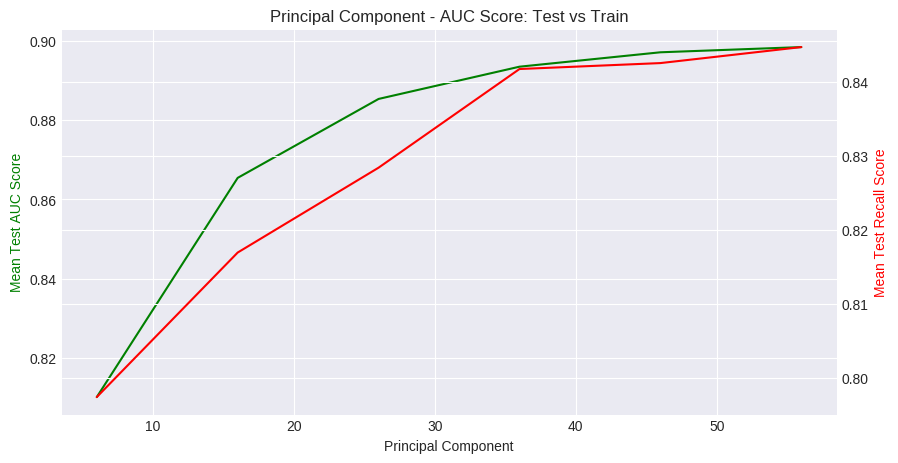

In [107]:
plot_hyperparameters(log_reg_cv_results, 'param_pca__n_components', 'Principal Component')

<font size=4> Final Logistic Regression Model</font>

False Positive Rate : [0.         0.17163528 1.        ]
True Positive Rate : [0.         0.81605691 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8222108177642834
Accuracy Score : 0.8270192200866571
Precision Score : 0.36851766865534646
Recall Score : 0.8160569105691057
F1 Score : 0.5077458109389819
Confusion Matrix : 
 [[6641 1376]
 [ 181  803]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      8017
           1       0.37      0.82      0.51       984

    accuracy                           0.83      9001
   macro avg       0.67      0.82      0.70      9001
weighted avg       0.91      0.83      0.85      9001



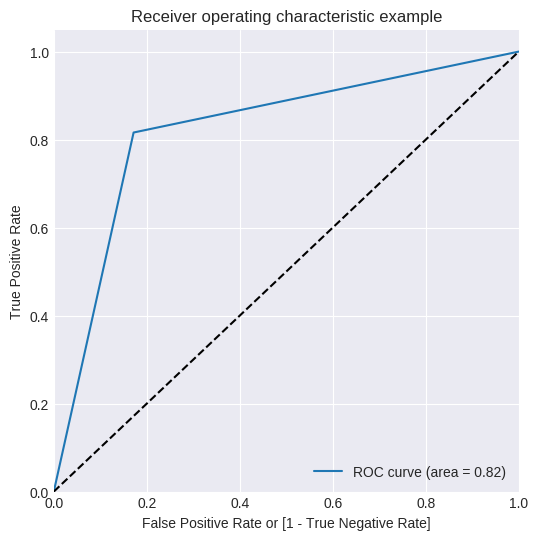

In [108]:
log_reg_pca, X_train_log_reg_pca, X_test_log_reg_pca = perform_pca(X_train_smote, X_test, 
                                                                   incremental_pca = True, n_components = 56)

final_log_reg = LogisticRegression()
final_log_reg.fit(X_train_log_reg_pca, y_train_smote)

y_pred_log_reg = final_log_reg.predict(X_test_log_reg_pca)
summarize_model(y_test, y_pred_log_reg)

<font size=4> ROC Curve</font>

An ROC curve demonstrates several things:

    - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## Decision Tree Classifier

    Default Data

    Without PCA

False Positive Rate : [0.         0.06660846 1.        ]
True Positive Rate : [0.         0.51219512 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7227933324612029
Accuracy Score : 0.8873458504610598
Precision Score : 0.48554913294797686
Recall Score : 0.5121951219512195
F1 Score : 0.49851632047477745
Confusion Matrix : 
 [[7483  534]
 [ 480  504]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      8017
           1       0.49      0.51      0.50       984

    accuracy                           0.89      9001
   macro avg       0.71      0.72      0.72      9001
weighted avg       0.89      0.89      0.89      9001



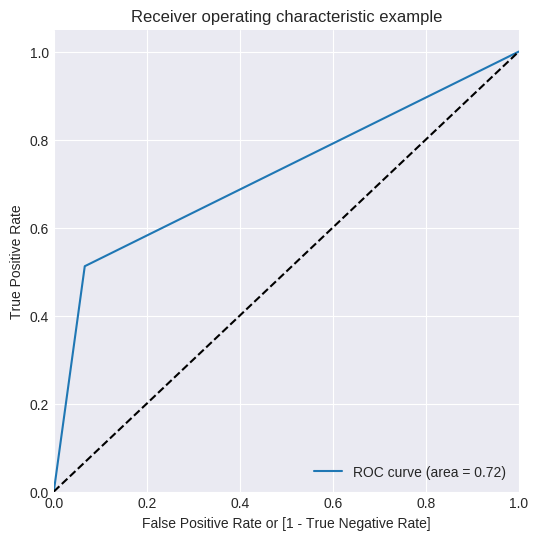

In [109]:
default_decision_tree = DecisionTreeClassifier(random_state = 100)

default_decision_tree.fit(X_train, y_train)

y_pred_decision_tree_default = default_decision_tree.predict(X_test)

summarize_model(y_test, y_pred_decision_tree_default)

    Default Data

    With PCA

False Positive Rate : [0.         0.08918548 1.        ]
True Positive Rate : [0.         0.36382114 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6373178286790976
Accuracy Score : 0.8510165537162537
Precision Score : 0.3336439888164026
Recall Score : 0.3638211382113821
F1 Score : 0.34807972775887214
Confusion Matrix : 
 [[7302  715]
 [ 626  358]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      8017
           1       0.33      0.36      0.35       984

    accuracy                           0.85      9001
   macro avg       0.63      0.64      0.63      9001
weighted avg       0.86      0.85      0.85      9001



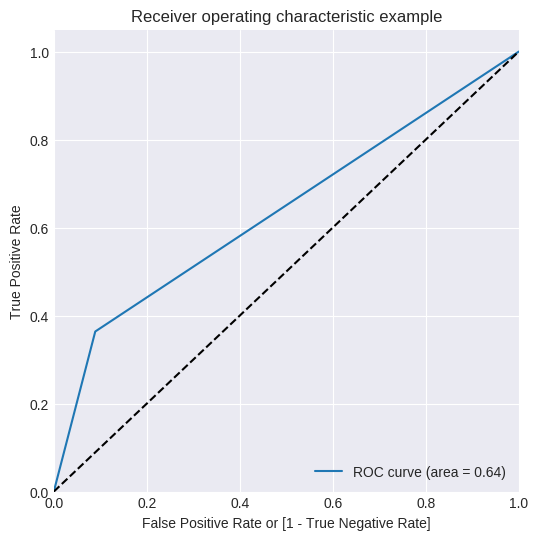

In [110]:
decision_tree_default_pca,\
X_train_decision_tree_default_pca, X_test_decision_tree_default_pca = perform_pca(X_train, X_test)

default_decision_tree_pca_model = DecisionTreeClassifier(random_state = 100)

default_decision_tree_pca_model.fit(X_train_decision_tree_default_pca, y_train)

y_pred_decision_tree_default_pca = default_decision_tree_pca_model.predict(X_test_decision_tree_default_pca)

summarize_model(y_test, y_pred_decision_tree_default_pca)

<font size=4> Decision Tree Classifier</font>

    SMOTE Data

    Without PCA

False Positive Rate : [0.         0.12036922 1.        ]
True Positive Rate : [0.         0.61280488 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7462178313157711
Accuracy Score : 0.8504610598822353
Precision Score : 0.38456632653061223
Recall Score : 0.6128048780487805
F1 Score : 0.47257053291536044
Confusion Matrix : 
 [[7052  965]
 [ 381  603]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      8017
           1       0.38      0.61      0.47       984

    accuracy                           0.85      9001
   macro avg       0.67      0.75      0.69      9001
weighted avg       0.89      0.85      0.86      9001



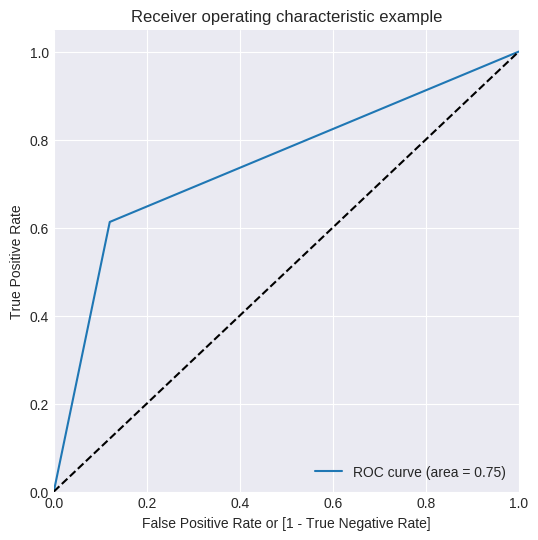

In [111]:
decision_tree_smote_default_model = DecisionTreeClassifier(random_state = 100)

decision_tree_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_decision_tree_smote_default = decision_tree_smote_default_model.predict(X_test)

summarize_model(y_test, y_pred_decision_tree_smote_default)

    SMOTE Data

    With PCA

False Positive Rate : [0.         0.16090807 1.        ]
True Positive Rate : [0.         0.52642276 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6827573469385685
Accuracy Score : 0.804910565492723
Precision Score : 0.28650442477876104
Recall Score : 0.5264227642276422
F1 Score : 0.37106017191977075
Confusion Matrix : 
 [[6727 1290]
 [ 466  518]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.84      0.88      8017
           1       0.29      0.53      0.37       984

    accuracy                           0.80      9001
   macro avg       0.61      0.68      0.63      9001
weighted avg       0.86      0.80      0.83      9001



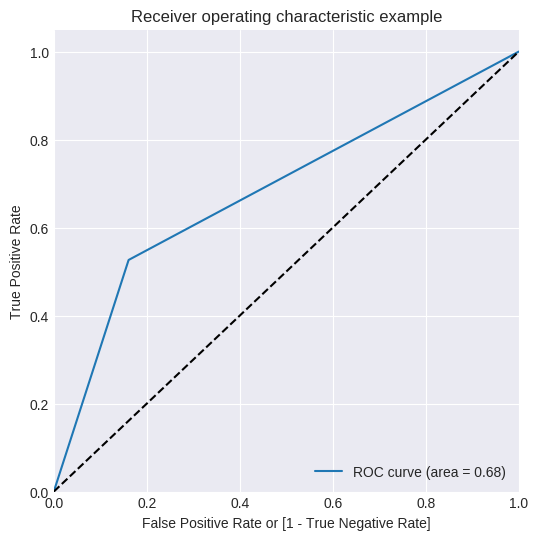

In [112]:
decision_tree_smote_default_pca,\
X_train_decision_tree_smote_default_pca,\
X_test_decision_tree_smote_default_pca = perform_pca(X_train_smote, X_test)

decision_tree_smote_default_pca_model = DecisionTreeClassifier(random_state = 100)

decision_tree_smote_default_pca_model.fit(X_train_decision_tree_smote_default_pca, y_train_smote)

y_pred_decision_tree_smote_default_pca = decision_tree_smote_default_pca_model.predict(X_test_decision_tree_smote_default_pca)

summarize_model(y_test, y_pred_decision_tree_smote_default_pca)

<font size=4> Insights:</font>

    Training Data with Smote class imbalance technique without PCA seems to be providing best overall performance for churn class prediction. 
    
    Hence, using the same for hyperparameters tuning

**Initialize parameters and set pipeline**

In [113]:
decision_tree_max_depth = range(1, 6, 1)
decision_tree_min_samples_leaf = range(1, 151, 50)

decision_tree_parameters = {'decision_tree__min_samples_leaf': decision_tree_min_samples_leaf,
                            'decision_tree__max_depth': decision_tree_max_depth}

decision_tree = DecisionTreeClassifier(random_state = 100)

decision_tree_pipeline = Pipeline(steps=[('decision_tree', decision_tree)])

**Hyperparameters Tuning**

In [114]:
# Create and Conduct Grid Search
decision_tree_grid_search = create_grid_search(decision_tree_pipeline, decision_tree_parameters)
decision_tree_cv_results = conduct_grid_search(decision_tree_grid_search, X_train_smote, y_train_smote)

{'decision_tree__max_depth': range(1, 6),
 'decision_tree__min_samples_leaf': range(1, 151, 50)}

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   19.4s finished


Best roc_auc score after hyperparameters tuning : 0.916501727951271
Best parameters after hyperparameters tuning for roc_auc score : {'decision_tree__min_samples_leaf': 51, 'decision_tree__max_depth': 5}


**Validating Hyperparameters Tuning results**

In [115]:
# Function to plot hyperparameters tuning results
def plot_params(dataframe, param, sub_param, param_name, sub_param_name):
    subplots_values = dataframe[param].unique()
    total_subplot_values = len(subplots_values)
    subplot_rows = math.ceil(total_subplot_values /2)
    fig = plt.figure(figsize = (25, subplot_rows * 6))
    for index, param_value in enumerate(subplots_values):
        param_ax1 = fig.add_subplot(subplot_rows, 2, (index + 1))
        plot_hyperparameters_subplot(dataframe[dataframe[param] == param_value], sub_param, 
                   param_ax1, sub_param_name, '{} = {}'.format(param_name, param_value))
    plt.show()

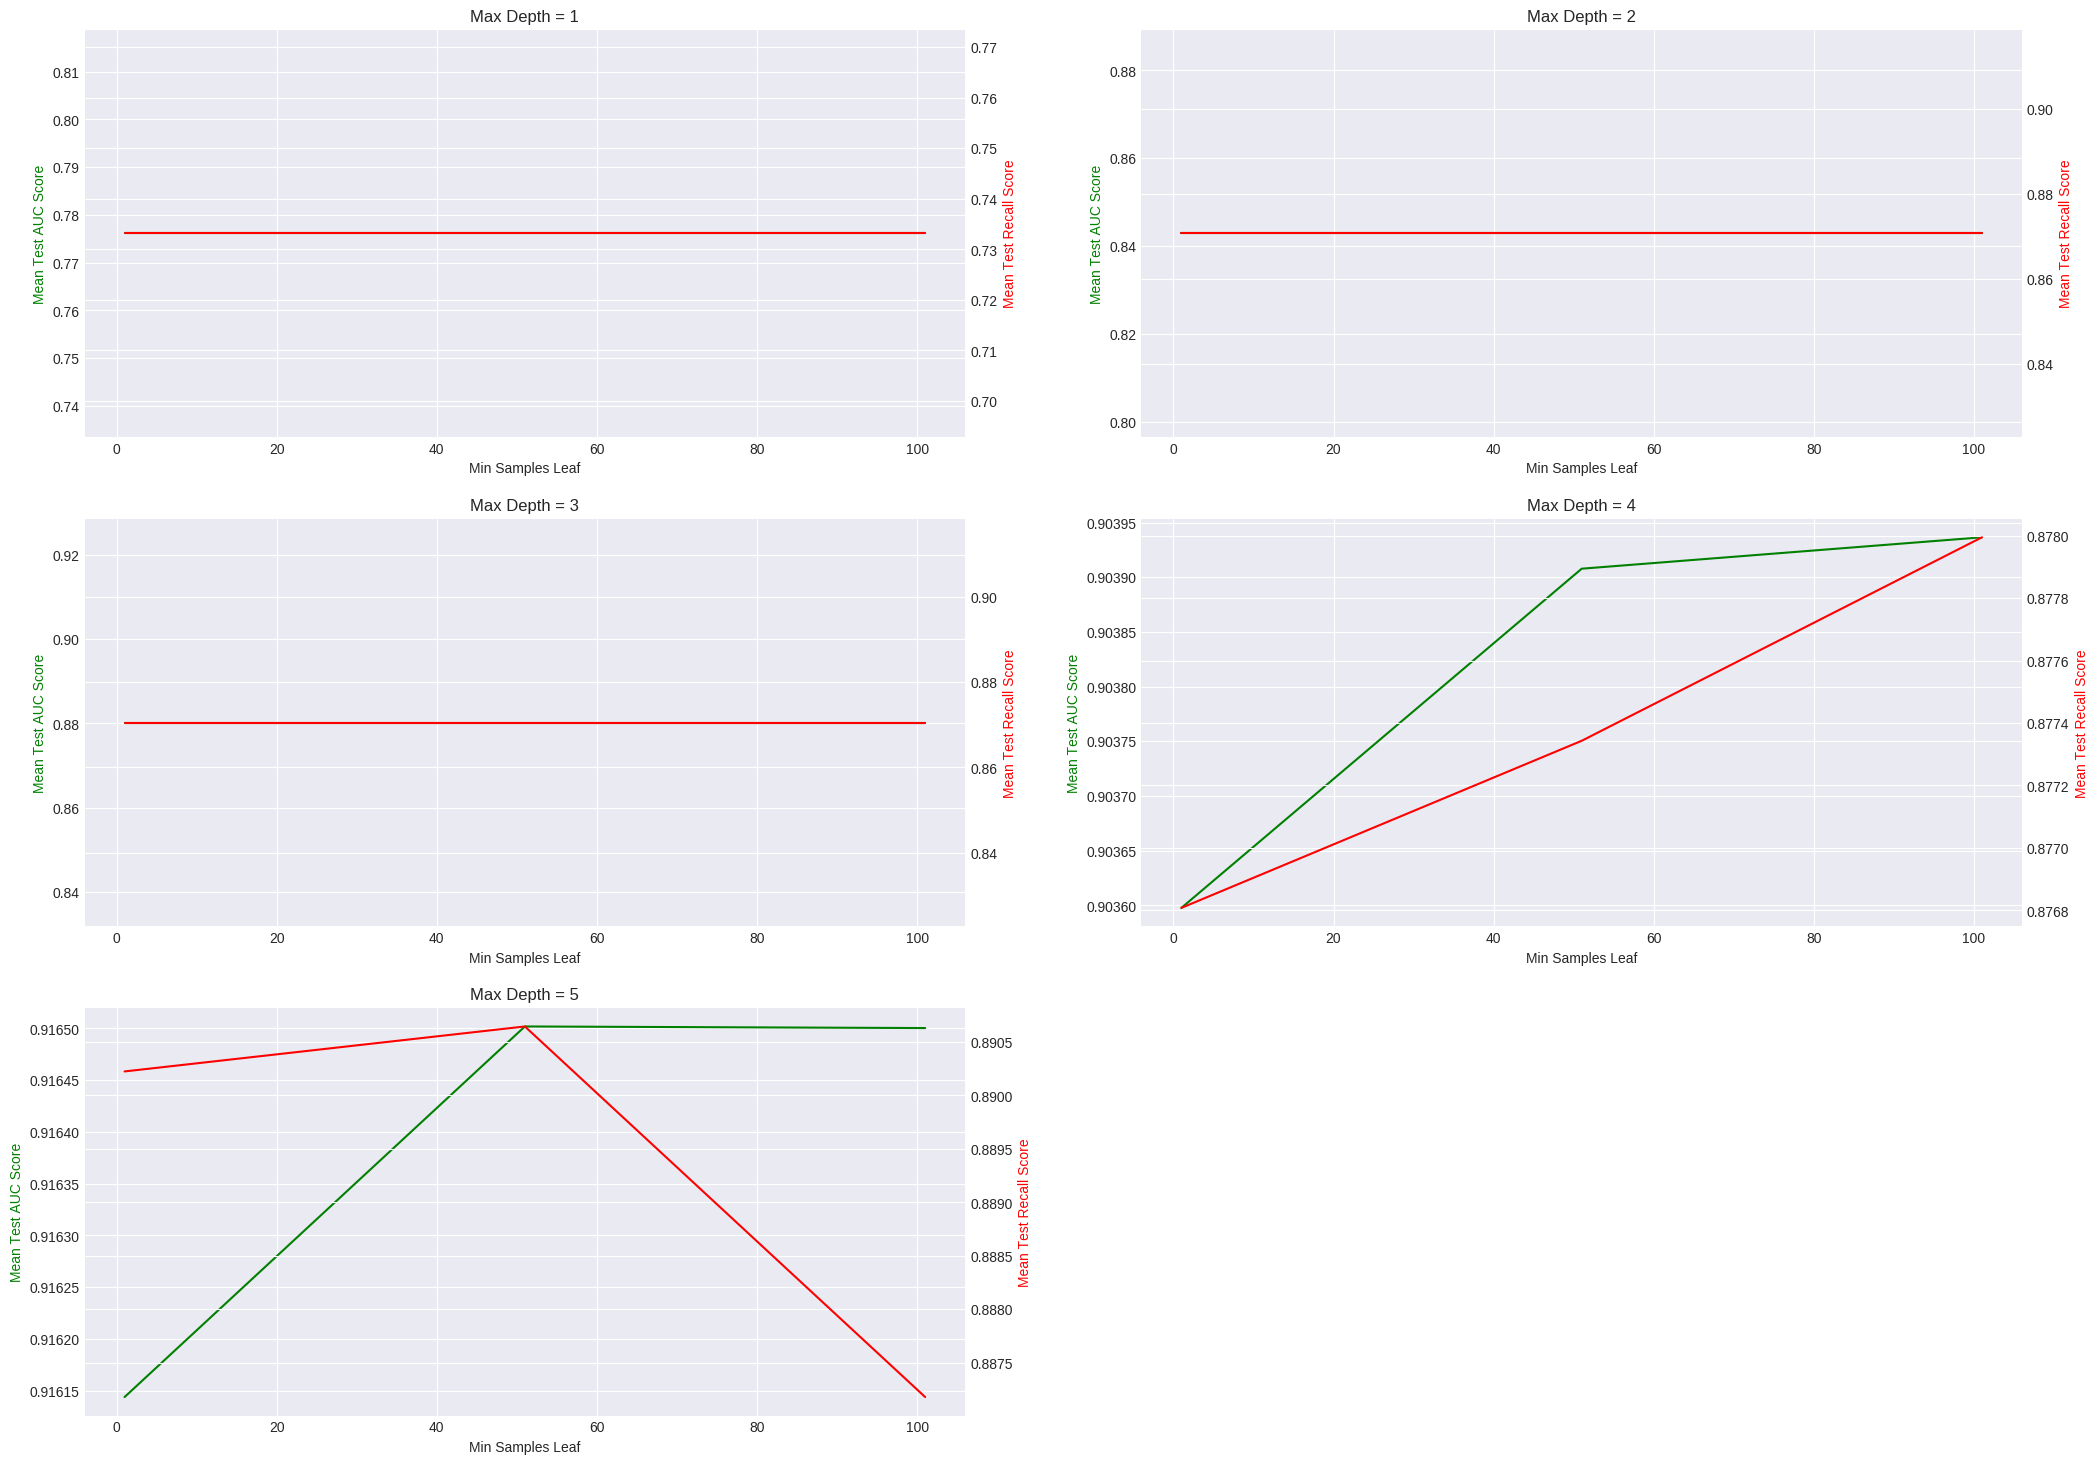

In [116]:
import math
plot_params(decision_tree_cv_results, 'param_decision_tree__max_depth',
                    'param_decision_tree__min_samples_leaf','Max Depth','Min Samples Leaf')

**Final Decision Tree Classifier Model**

False Positive Rate : [0.         0.17562679 1.        ]
True Positive Rate : [0.         0.82723577 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.825804489646493
Accuracy Score : 0.8246861459837795
Precision Score : 0.36633663366336633
Recall Score : 0.8272357723577236
F1 Score : 0.5077978789769183
Confusion Matrix : 
 [[6609 1408]
 [ 170  814]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      8017
           1       0.37      0.83      0.51       984

    accuracy                           0.82      9001
   macro avg       0.67      0.83      0.70      9001
weighted avg       0.91      0.82      0.85      9001



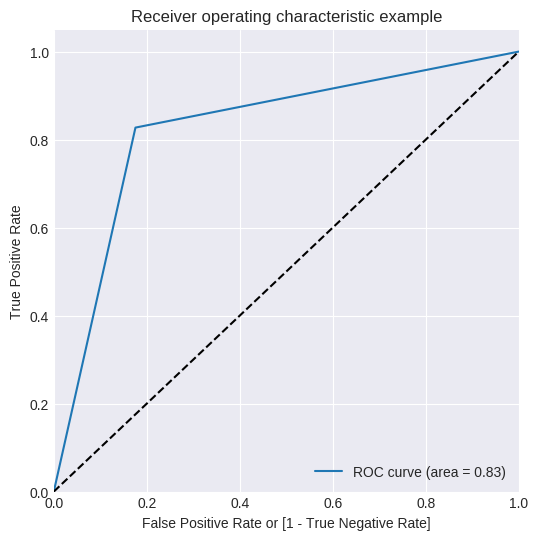

In [117]:
final_decision_tree = DecisionTreeClassifier(random_state = 100, min_samples_leaf = 50, max_depth = 5)
final_decision_tree.fit(X_train_smote, y_train_smote)

y_pred_decision_tree = final_decision_tree.predict(X_test)
summarize_model(y_test, y_pred_decision_tree)

**Plot Final Decision Tree**

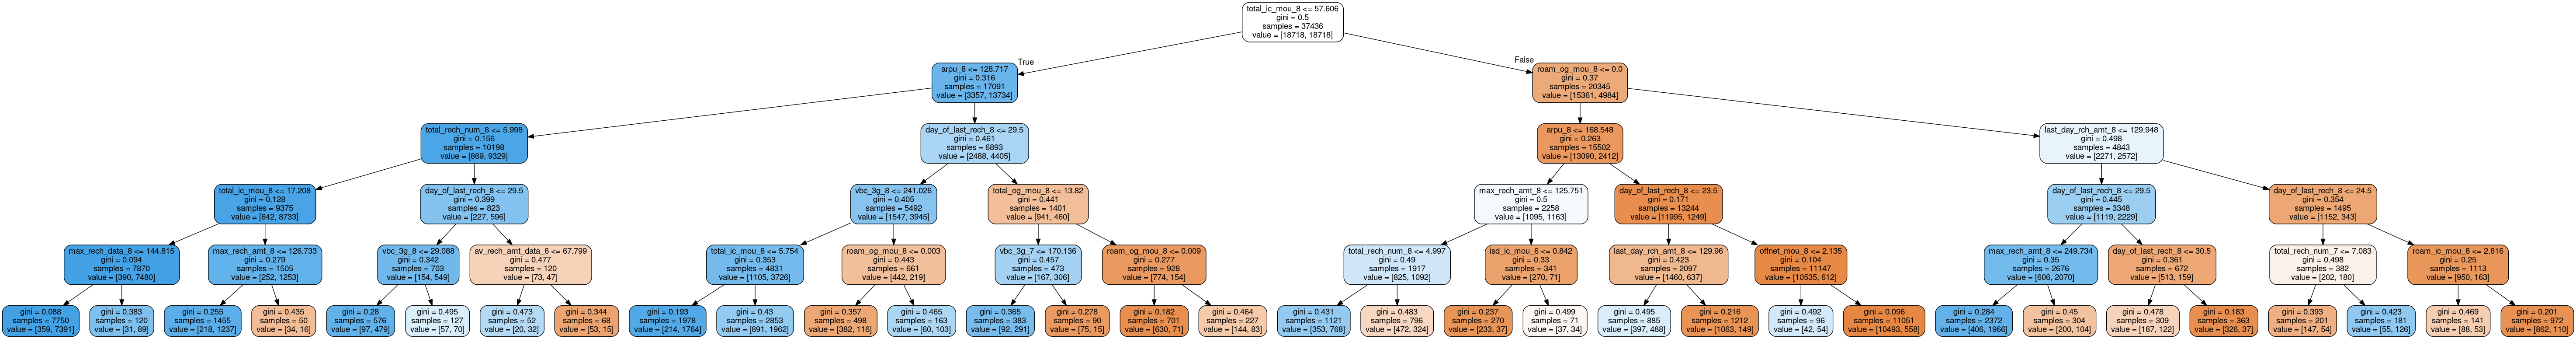

In [118]:
import pydotplus, graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image

# Plot Decision tree with best params after hyperparameter tuning
dot_data = StringIO()  
export_graphviz(final_decision_tree, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest Classifier

    Since Random Forest is an ensemble of Decision Trees. Therefore, using smote imbalance technique without PCA data set to train model.

<b> Default Random Forest Classifier Model</b>

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


False Positive Rate : [0.         0.05887489 1.        ]
True Positive Rate : [0.         0.70223577 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8216804407503973
Accuracy Score : 0.9150094433951783
Precision Score : 0.5941530524505589
Recall Score : 0.7022357723577236
F1 Score : 0.6436888681881696
Confusion Matrix : 
 [[7545  472]
 [ 293  691]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8017
           1       0.59      0.70      0.64       984

    accuracy                           0.92      9001
   macro avg       0.78      0.82      0.80      9001
weighted avg       0.92      0.92      0.92      9001



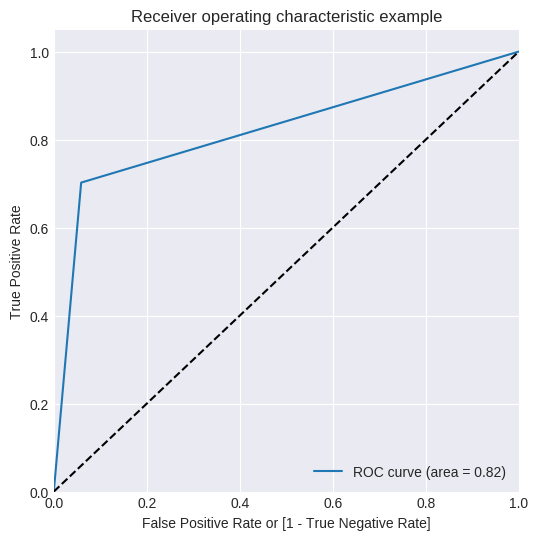

Out of Bag Error : 0.9530398546853296


In [119]:
random_forest_default_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1)
random_forest_default_model.fit(X_train_smote, y_train_smote)

y_pred_random_forest_default = random_forest_default_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_default)
print('Out of Bag Error : {}'.format(random_forest_default_model.oob_score_))

**Initialize parameters and set pipeline**


In [120]:
random_forest_max_features = range(5, 61, 5)
random_forest_n_estimators = range(50, 251, 50)

random_forest_parameters = {'random_forest__max_features': random_forest_max_features, 
                           'random_forest__n_estimators': random_forest_n_estimators}

random_forest = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, n_jobs= -1)

random_forest_pipeline = Pipeline(steps=[('random_forest', random_forest)])

**Hyperparameters Tuning**

In [121]:
random_forest_grid_search = create_grid_search(random_forest_pipeline, random_forest_parameters, cv_fold_split = 2)
random_forest_cv_results = conduct_grid_search(random_forest_grid_search, X_train_smote, y_train_smote)

{'random_forest__max_features': range(5, 61, 5),
 'random_forest__n_estimators': range(50, 251, 50)}

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 32.6min finished


Best roc_auc score after hyperparameters tuning : 0.9837239563487112
Best parameters after hyperparameters tuning for roc_auc score : {'random_forest__max_features': 15, 'random_forest__n_estimators': 250}


**Validate Hyperparameters tuning results**

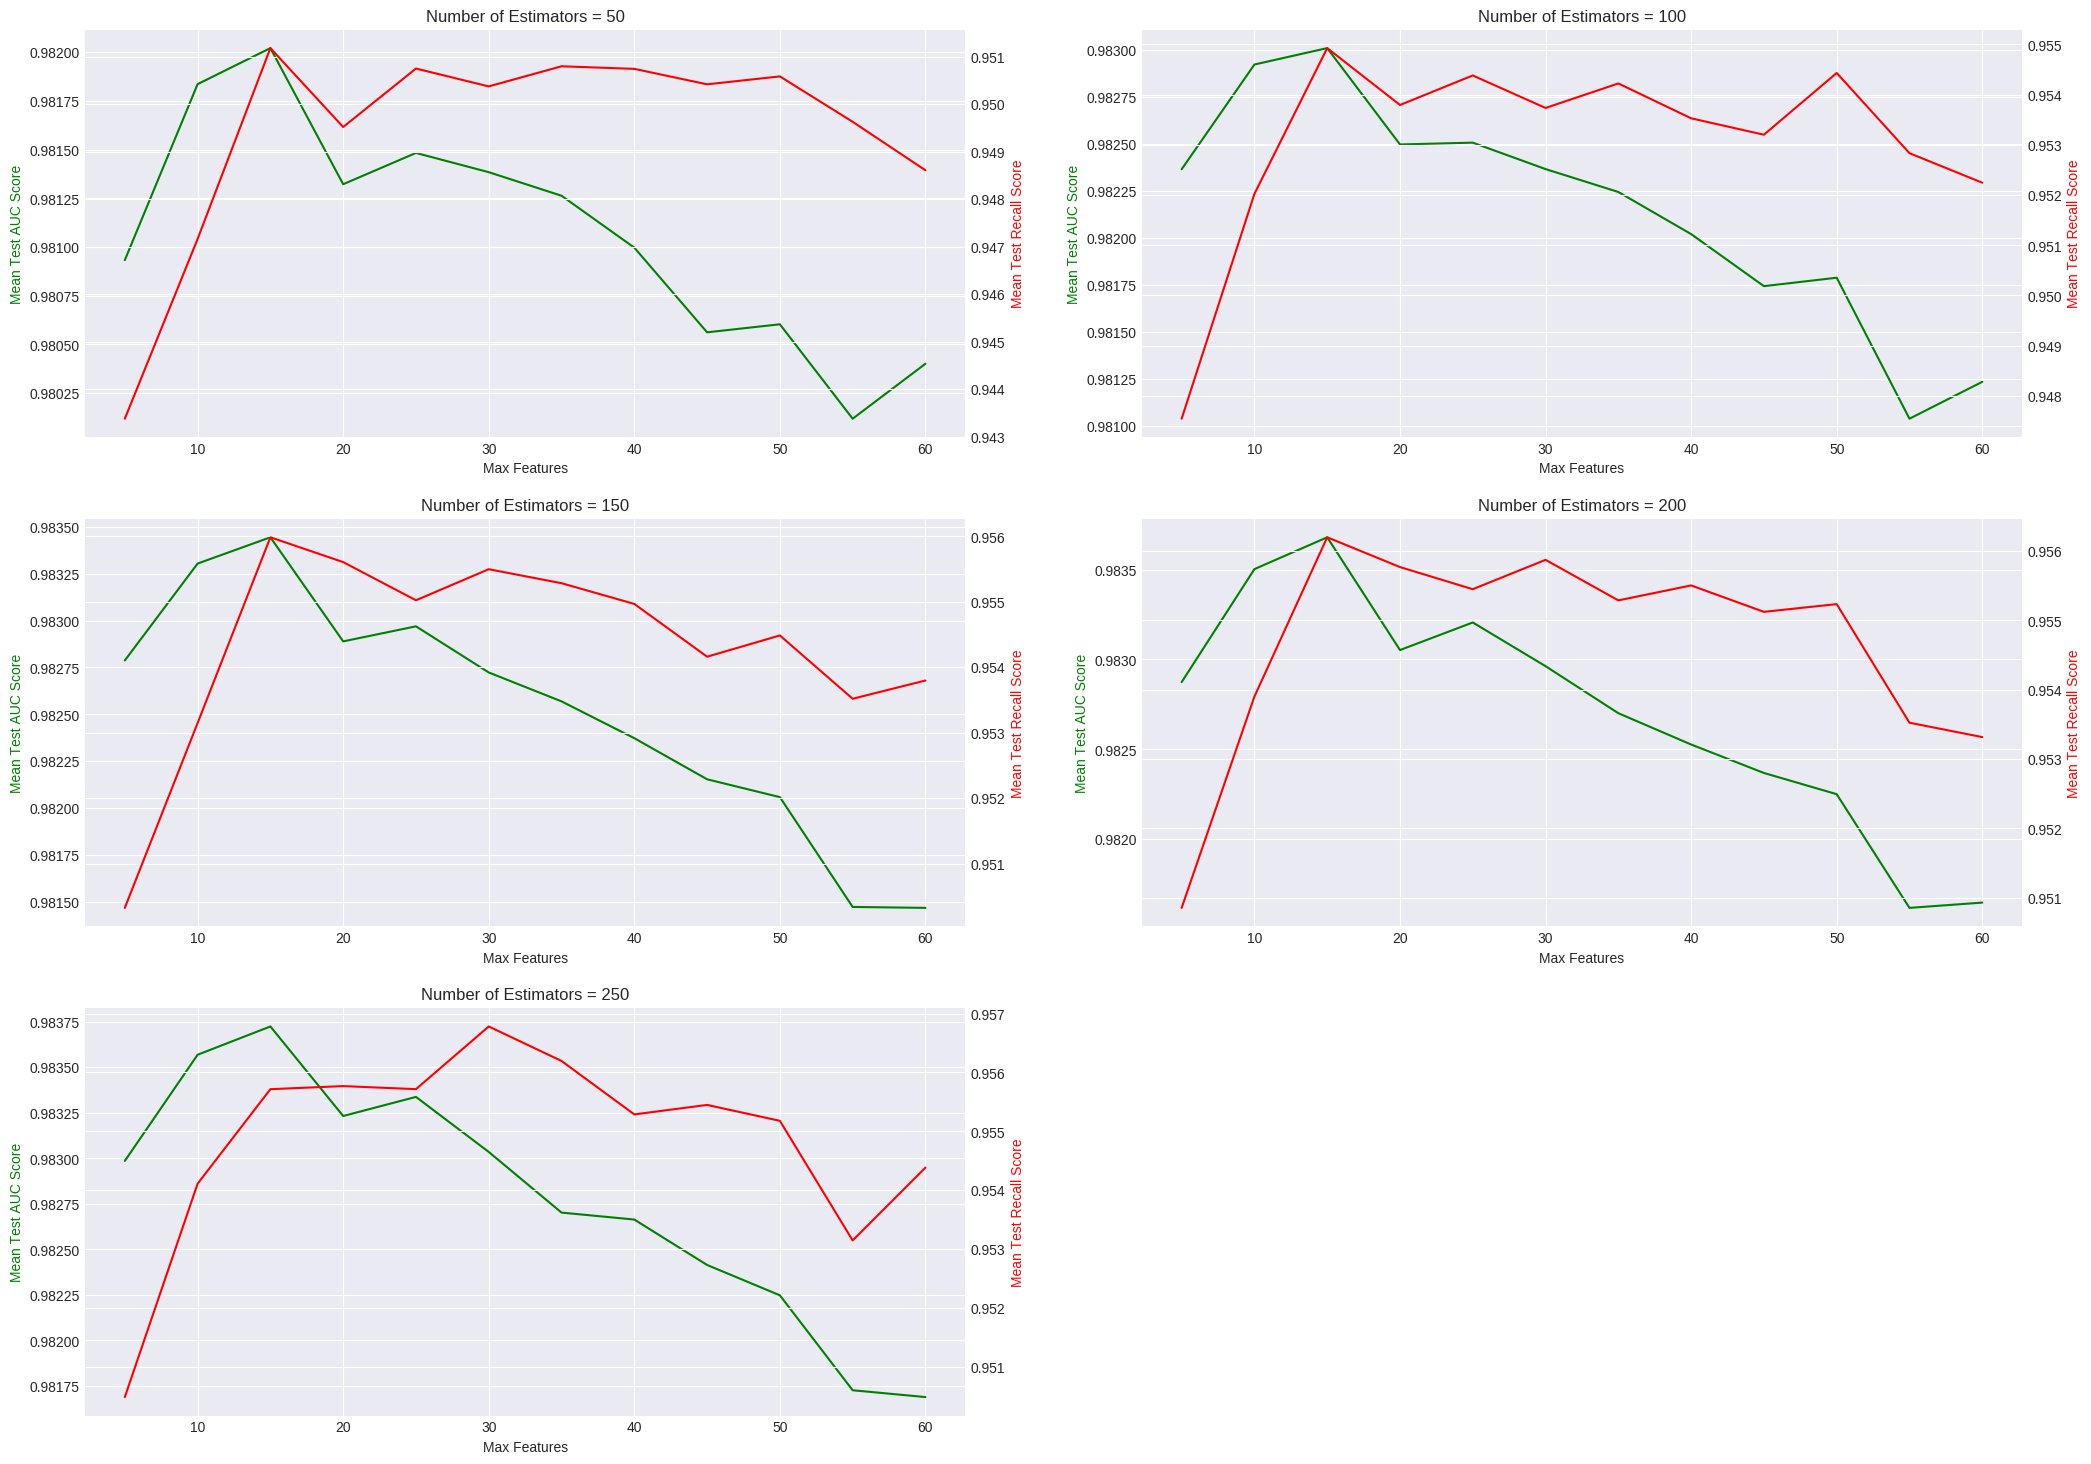

In [122]:
plot_params(random_forest_cv_results, 'param_random_forest__n_estimators', 'param_random_forest__max_features', 
            'Number of Estimators', 'Max Features')

**Final Random Forest Classifier Model**

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.2s finished


False Positive Rate : [0.         0.05949857 1.        ]
True Positive Rate : [0.         0.69512195 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8178116928356509
Accuracy Score : 0.913676258193534
Precision Score : 0.5891472868217055
Recall Score : 0.6951219512195121
F1 Score : 0.6377622377622378
Confusion Matrix : 
 [[7540  477]
 [ 300  684]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8017
           1       0.59      0.70      0.64       984

    accuracy                           0.91      9001
   macro avg       0.78      0.82      0.79      9001
weighted avg       0.92      0.91      0.92      9001



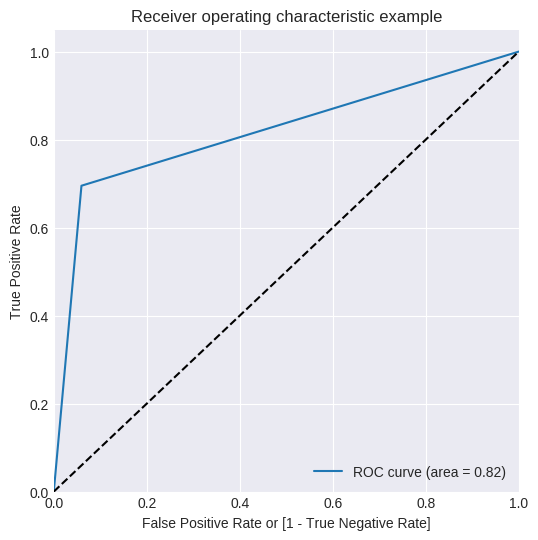

In [123]:
random_forest_final_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1, max_features = 15, n_estimators = 250)
random_forest_final_model.fit(X_train_smote, y_train_smote)

y_pred_random_forest_final = random_forest_final_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_final)

## XGBoost

    Since XGBoost is an ensemble of Decision Trees. 

    Therefore, continuing with smote class imbalancing without PCA data to train model.

**Default XGBoost Classifier Model**

False Positive Rate : [0.         0.03866783 1.        ]
True Positive Rate : [0.         0.59349593 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.777414052049963
Accuracy Score : 0.9211198755693811
Precision Score : 0.6532438478747203
Recall Score : 0.5934959349593496
F1 Score : 0.6219382321618744
Confusion Matrix : 
 [[7707  310]
 [ 400  584]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      8017
           1       0.65      0.59      0.62       984

    accuracy                           0.92      9001
   macro avg       0.80      0.78      0.79      9001
weighted avg       0.92      0.92      0.92      9001



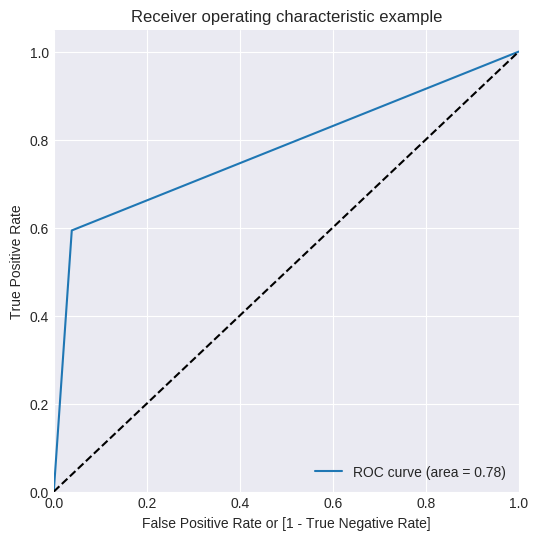

In [124]:
import xgboost
from xgboost import XGBClassifier

xg_boost_default_model = XGBClassifier(random_state = 100,  
                                       verbosity = 1, n_jobs = -1)
xg_boost_default_model.fit(X_train_smote, y_train_smote)

y_pred_xg_boost_default = xg_boost_default_model.predict(X_test)
summarize_model(y_test, y_pred_xg_boost_default)

**Initialize Parameters and set pipeline**

In [125]:
xg_boost_n_estimators = range(50, 501, 50)

xg_boost_parameters = {'xg_boost__n_estimators': xg_boost_n_estimators}

xg_boost = XGBClassifier(random_state = 100,  n_jobs = -1)

xg_boost_pipeline = Pipeline(steps=[('xg_boost', xg_boost)])

**Hyperparameters tuning**

In [126]:
xg_boost_grid_search = create_grid_search(xg_boost_pipeline, xg_boost_parameters, cv_fold_split = 2)
xg_boost_cv_results = conduct_grid_search(xg_boost_grid_search, X_train_smote, y_train_smote)

{'xg_boost__n_estimators': range(100, 501, 100)}

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.2min finished


Best roc_auc score after hyperparameters tuning : 0.9929574153814635
Best parameters after hyperparameters tuning for roc_auc score : {'xg_boost__n_estimators': 500}


**Validate HyperParameters tuning results**

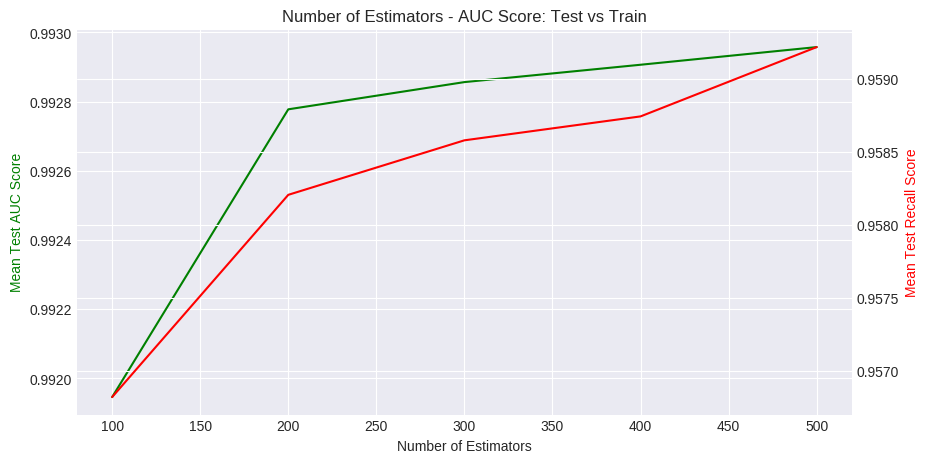

In [127]:
plot_hyperparameters(xg_boost_cv_results, 'param_xg_boost__n_estimators', 'Number of Estimators')

**Final XGBoost Classifier Model**

False Positive Rate : [0.         0.03280529 1.        ]
True Positive Rate : [0.         0.59146341 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.779329062936382
Accuracy Score : 0.9261193200755472
Precision Score : 0.6887573964497041
Recall Score : 0.5914634146341463
F1 Score : 0.6364133406232914
Confusion Matrix : 
 [[7754  263]
 [ 402  582]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      8017
           1       0.69      0.59      0.64       984

    accuracy                           0.93      9001
   macro avg       0.82      0.78      0.80      9001
weighted avg       0.92      0.93      0.92      9001



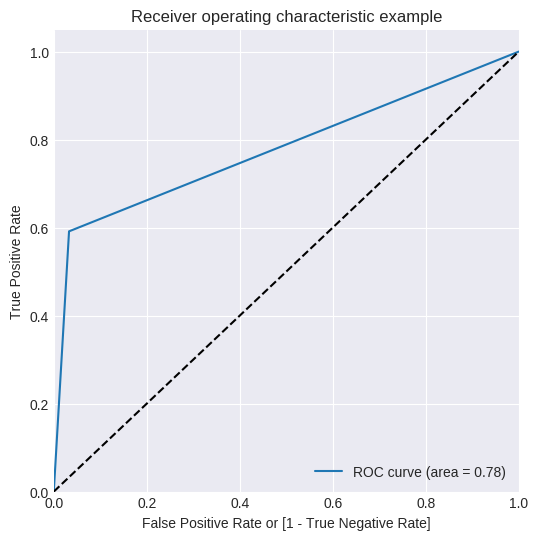

In [128]:
xg_boost_final_model = XGBClassifier(random_state = 100,  
                                       verbosity = 1, n_jobs = -1, n_estimators = 500)
xg_boost_final_model.fit(X_train_smote, y_train_smote)

y_pred_xg_boost_final = xg_boost_final_model.predict(X_test)
summarize_model(y_test, y_pred_xg_boost_final)

# Step 3: Identifying important churn indicators and business recommendation


    All above mentioned algorithm implementations have also been tested with default data and SMOTE class imbalance technique. The same has also been tested with/without PCA to cross-check the performance with chosen class imbalance technique and PCA option.

    All above mentioned algorithm implementations have also been hypertuned and tested with other parameters.

    For each implemented algorithm, only the class imbalance technique with PCA option and hyperparameter tuning providing the best result have been retained above.

Following class imbalance and PCA option have been used for above mentioned algorithm implementation:

1. SMOTE sampled train data set without PCA for decision trees based algorithms.
2. Default train data set without PCA for balanced decision trees based algorithms.
3. SMOTE sampled train data set with PCA for logistic regression and SVM algorithms.


    Random Forest and XgBoost Algorithms are very good algorithms in terms of classification problems but Out of all implemented algorithms, Decision Tree seems to be the best model for churn prediction based on selected evaluation metrics of Recall and AUC Score after hyperparameters tunings.

## Model Features Selection

**Importance Features Selection Model**

In [129]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(final_decision_tree)
sel.fit(X_train_smote, y_train_smote)

important_features_results = pd.DataFrame(list(zip(X_train.columns, sel.get_support(), 
                                            final_decision_tree.feature_importances_)))
important_features_results.columns = ('column_name', 'support', 'importance')
important_features_results = important_features_results[important_features_results['support'] == True]
important_features_results.reset_index(inplace = True, drop = True)
important_features_results.drop('support', axis = 1, inplace = True)
important_features_results = important_features_results.sort_values(by='importance', ascending = False)
kpi_results = important_features_results['column_name']
display(important_features_results)

column_name  importance
3      total_ic_mou_8        0.55
0              arpu_8        0.12
1       roam_og_mou_8        0.10
8  day_of_last_rech_8        0.09
6  last_day_rch_amt_8        0.05
7            vbc_3g_8        0.02
5      max_rech_amt_8        0.02
2      total_og_mou_8        0.01
4    total_rech_num_8        0.01

**Analyse the columns KPIs**

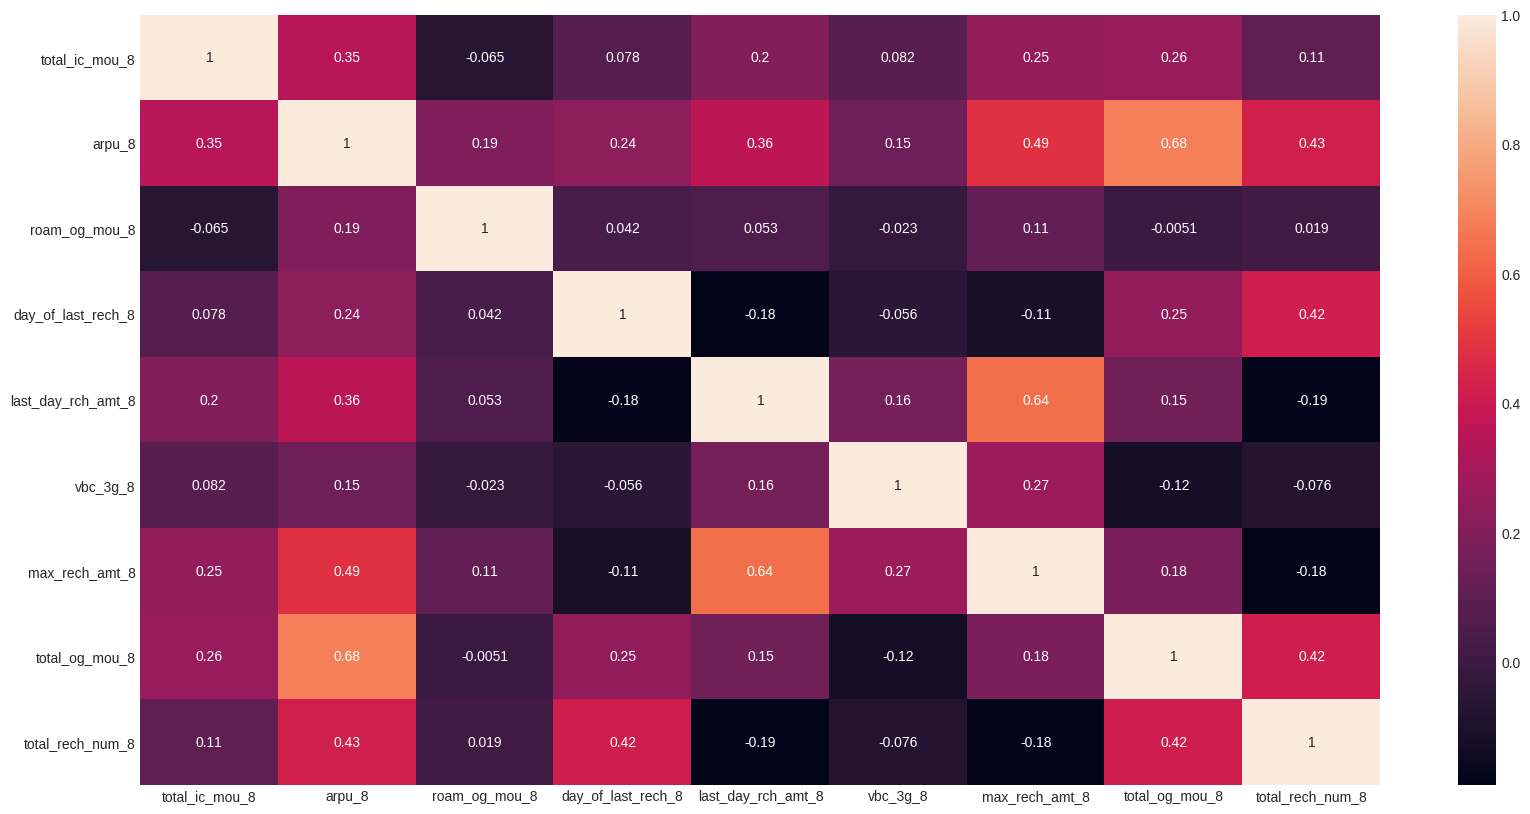

In [130]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train[kpi_results].corr(), annot = True)
plt.show()

**Analyse Highly correlated KPIs**

In [131]:
# Create correlation matrix
kpi_corr_matrix = X_train[kpi_results].corr().abs()

# Select upper triangle of correlation matrix
kpi_upper = kpi_corr_matrix.where(np.triu(np.ones(kpi_corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.5
kpi_corr_columns = [column for column in kpi_upper.columns if any(kpi_upper[column] >= 0.5)]

print('KPI corelated columns : \n {}'.format(kpi_corr_columns))

important_feature_results_without_corr = important_features_results[~important_features_results['column_name']
                                                       .isin(kpi_corr_columns)].copy()

important_features_results_without_corr = important_feature_results_without_corr['column_name']
display(important_feature_results_without_corr)

KPI corelated columns : 
 ['max_rech_amt_8', 'total_og_mou_8']


column_name  importance
3      total_ic_mou_8        0.55
0              arpu_8        0.12
1       roam_og_mou_8        0.10
8  day_of_last_rech_8        0.09
6  last_day_rch_amt_8        0.05
7            vbc_3g_8        0.02
4    total_rech_num_8        0.01

**Validate the final selected features**

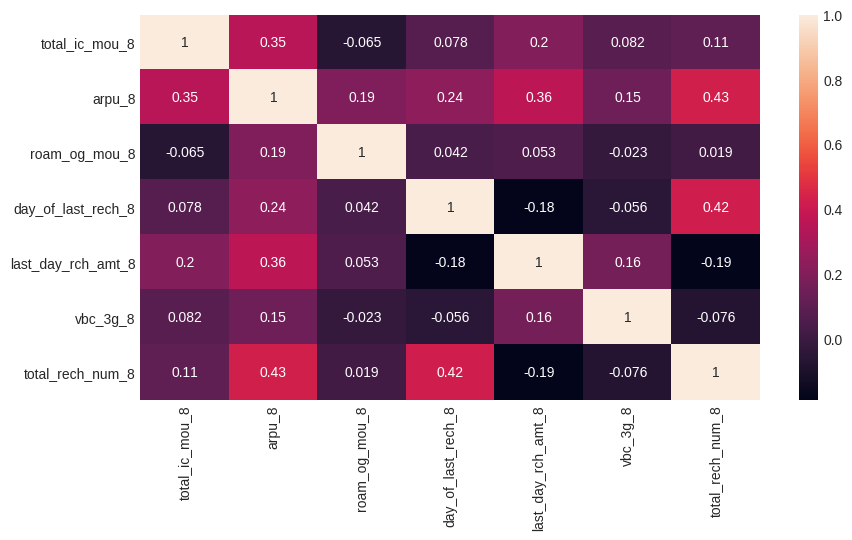

In [132]:
plt.figure(figsize = (10, 5))
sns.heatmap(X_train[important_features_results_without_corr].corr(), annot = True)
plt.show()

**Plot All vs Uncorrelated Importance Features**

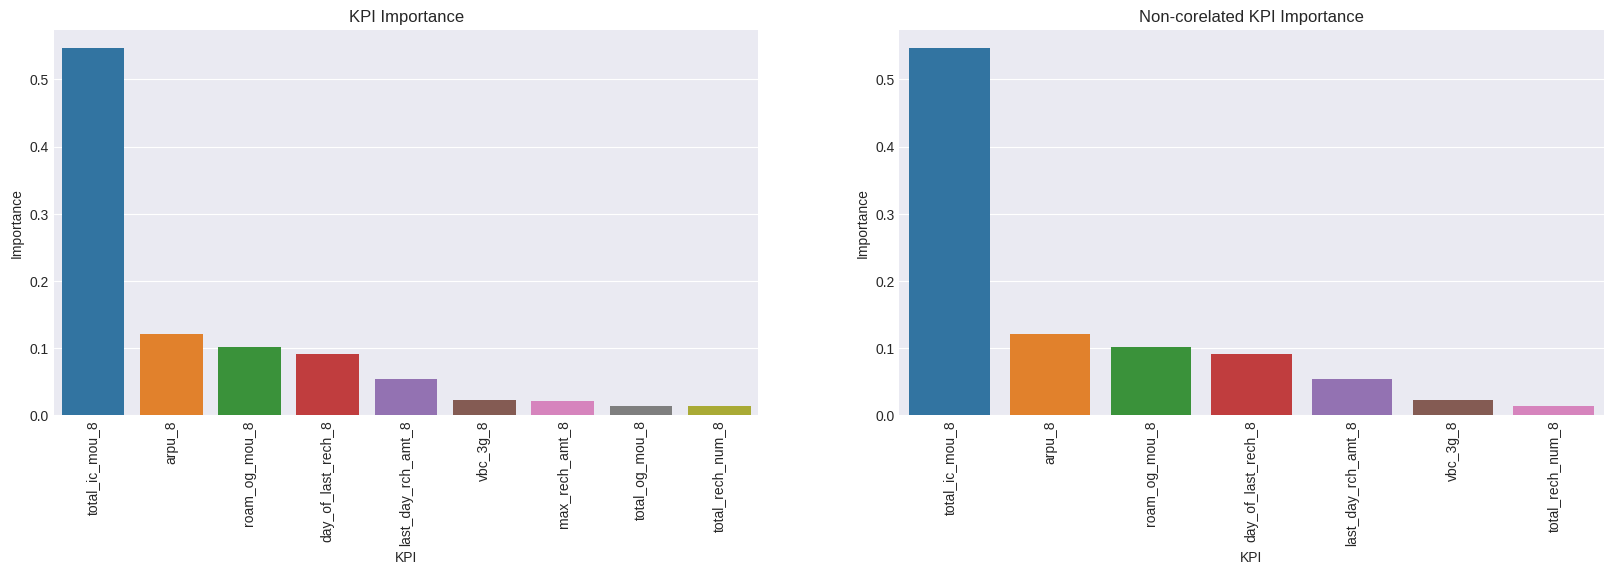

In [133]:
plt.figure(figsize=(20, 5))

plt.subplot(121)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=important_features_results, 
                           order = important_features_results['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)

plt.subplot(122)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=important_feature_results_without_corr, 
                           order = important_feature_results_without_corr['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='Non-corelated KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)
    
plt.show()

**Plotting selected Features distribution for Churn vs Non-churn**

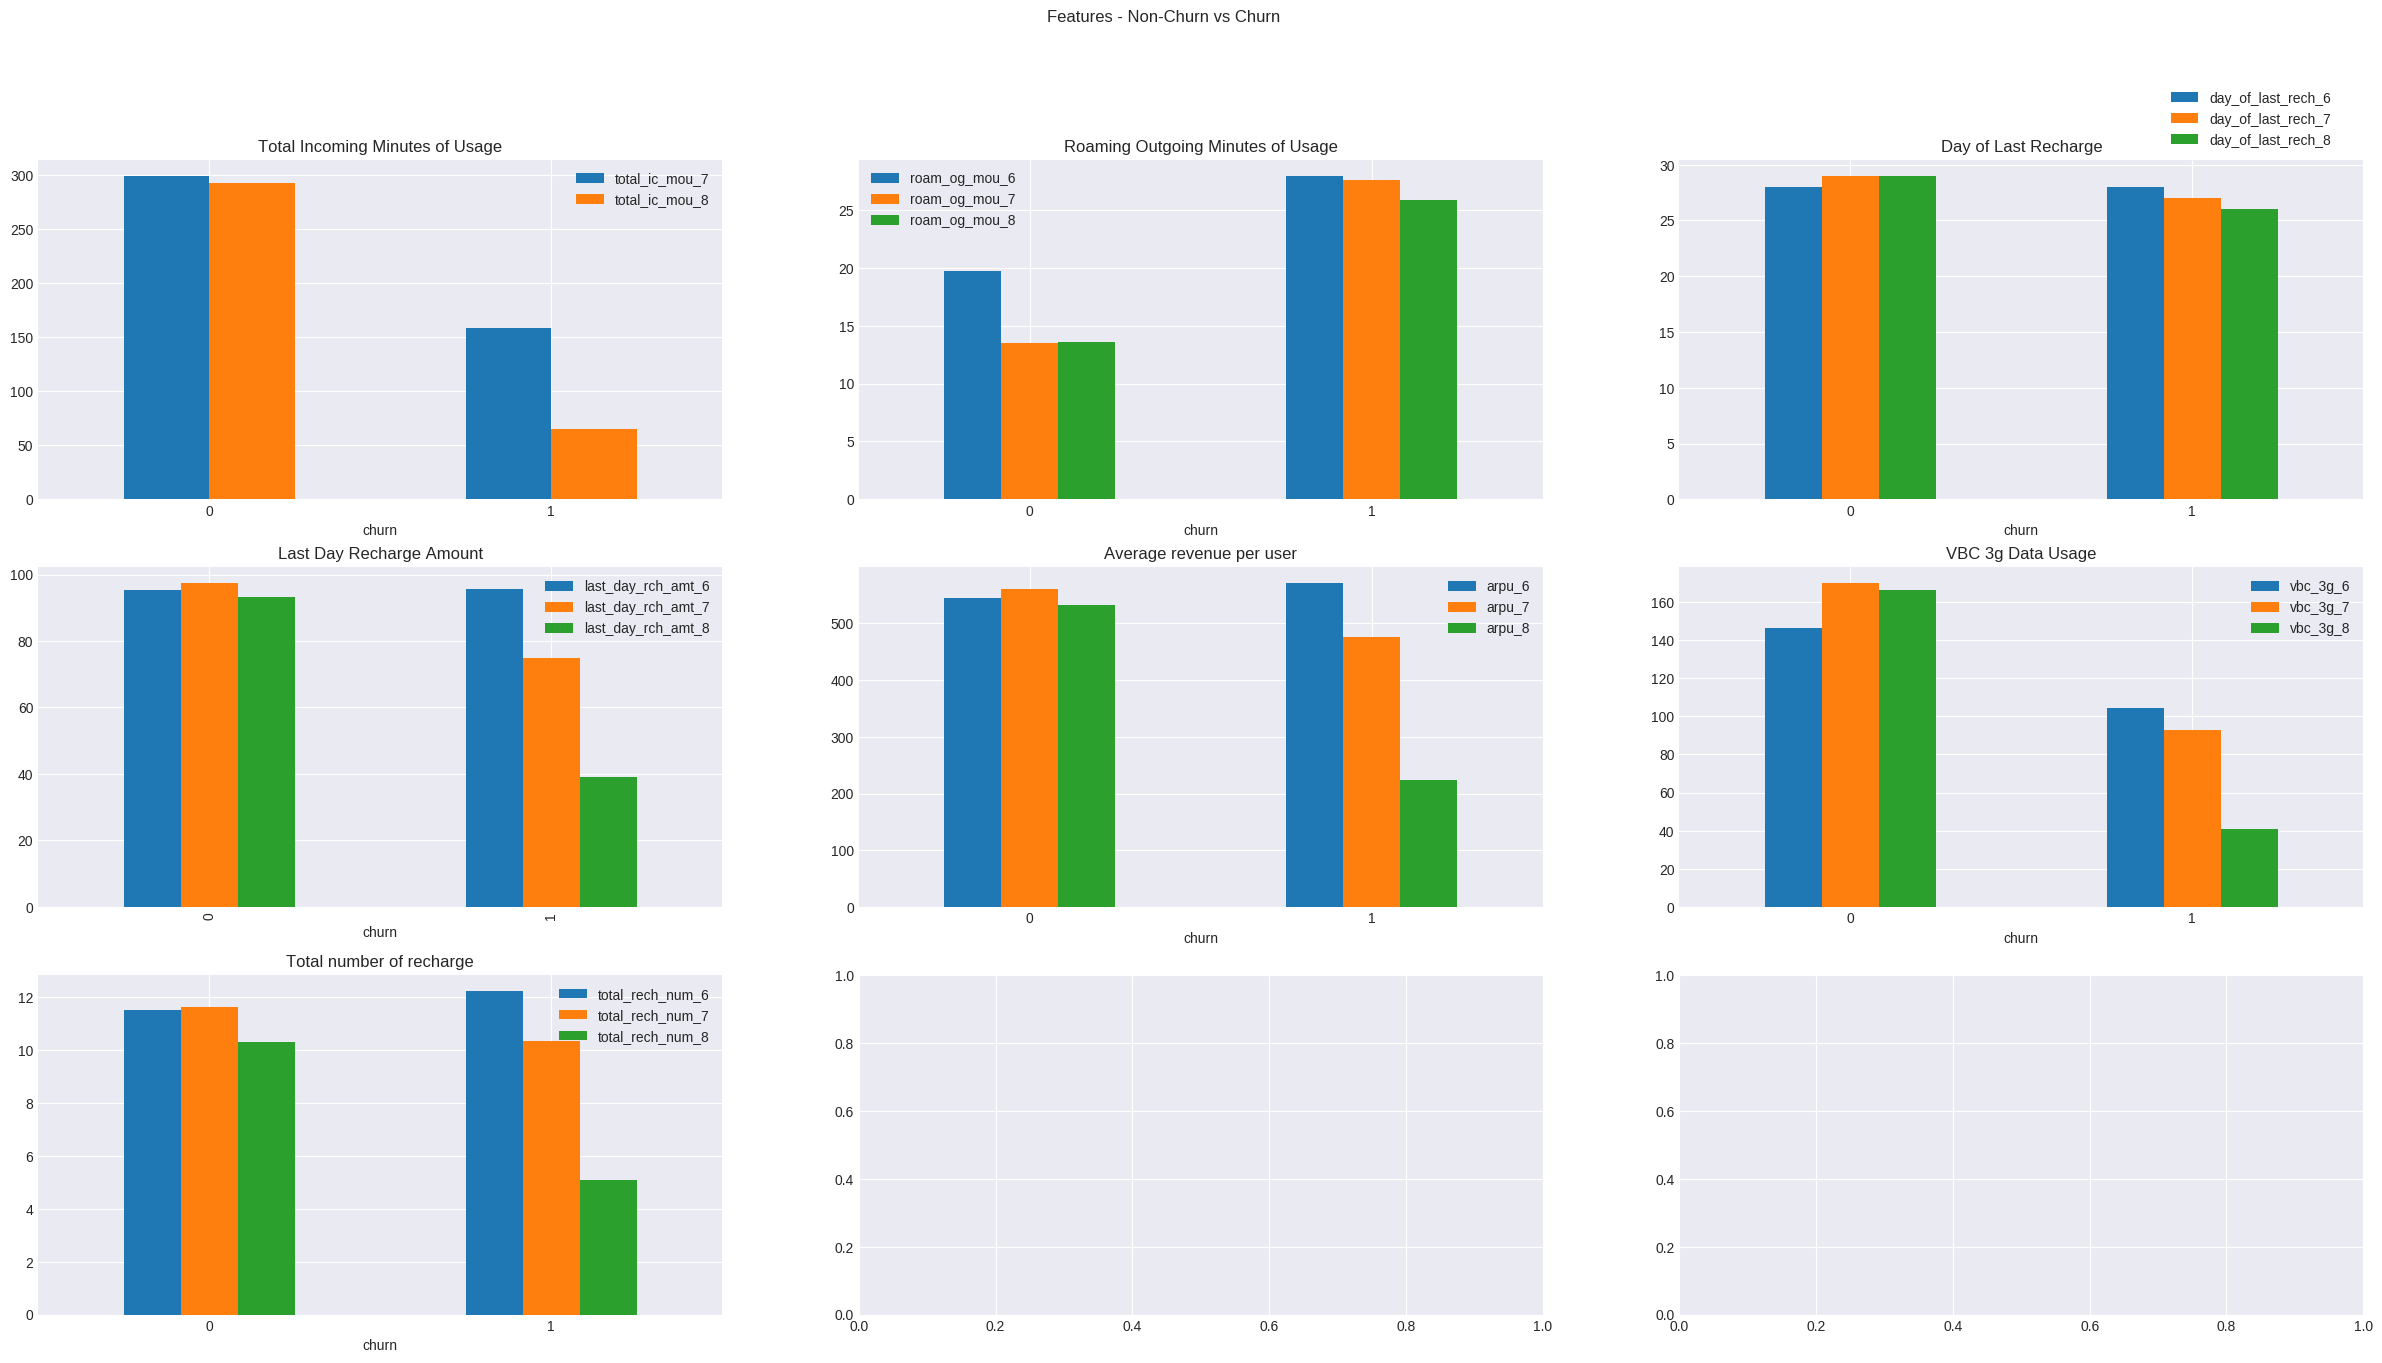

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (30,15))

plt.suptitle('Features - Non-Churn vs Churn')

total_ic_mou_df = master_df.groupby(['churn'])['total_ic_mou_7', 'total_ic_mou_8'].mean()
total_ic_mou_ax = total_ic_mou_df.plot.bar(ax=axes[0,0], title = 'Total Incoming Minutes of Usage', rot = 0)
total_ic_mou_ax.legend(loc='upper right')

roam_og_mou_df = master_df.groupby(['churn'])['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean()
roam_og_mou_ax = roam_og_mou_df.plot.bar(ax=axes[0,1], title = 'Roaming Outgoing Minutes of Usage', rot = 0)
roam_og_mou_ax.legend(loc='upper left')

day_of_last_rech_df = master_df.groupby(['churn'])['day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8'].median()
day_of_last_rech_ax = day_of_last_rech_df.plot.bar(ax=axes[0, 2], title = 'Day of Last Recharge', rot = 0)
day_of_last_rech_ax.legend(bbox_to_anchor=(0.7, 1))

last_day_rch_amt_df = master_df.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].mean()
last_day_rch_amt_ax = last_day_rch_amt_df.plot.bar(ax=axes[1, 0], title = 'Last Day Recharge Amount')
last_day_rch_amt_ax.legend(loc='upper right')

arpu_df = master_df.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].mean()
arpu_df_ax = arpu_df.plot.bar(ax=axes[1, 1], title = 'Average revenue per user', rot = 0)
arpu_df_ax.legend(loc='upper right')

vbc_3g_df = master_df.groupby(['churn'])['vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8'].mean()
vbc_3g_df_ax = vbc_3g_df.plot.bar(ax=axes[1, 2], title = 'VBC 3g Data Usage', rot = 0)
vbc_3g_df_ax.legend(loc='upper right')

total_rech_num_df = master_df.groupby(['churn'])['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'].mean()
total_rech_num_df_ax = total_rech_num_df.plot.bar(ax=axes[2, 0], title = 'Total number of recharge', rot = 0)
total_rech_num_df_ax.legend(loc='upper right')


plt.show()

## Business Recommendations

Churn customers have clear distinct behavioural usage pattern when compared to Non-Churn customers.

    1. Churn customers are using more roaming outgoing calls, generating more average revenue per user as compared to Non-Churn customers. Hence, they seem to be a part of customer-base frequently travelling between different circles.

    2. Age on Network for Churn customers is also less as compared to Non-Churn customers as they seem to be frequently switching telco operators for cost saving. Also, the same is supported by the fact that the Churn customers recharges with lesser amount but more frequently when compared to Non-churn customers. They seem to be recharging as and when required.

    3. Non-Churn customers are using more Incoming calls and 3g volume as compared to Churn customers. Hence, they seem to be a part of customer-base operating within same circle.

    4. Bad Phase is Crucial for Prediction in Churn as most of important variable are coming from this phase.

    5. Voice usage(incoming) in mostly "action phase" seems a key feature in determining the Churn and hence company should keep track on the voice usage and also provide incentives/offers to users who are categorised by the model as potential churners.

    6. Difference or change(decrease) in the arpu should be taken as key hint for the user to churn and necessary action should be taken for the user showing significant change in the arpu.

    7. Last Day Recharge amount in action month is a key indicator to decide if customer is likely to churn or not.

    8. It is also observed that recharge amount and minutes of usage, need to be used as a focus and a potential warning of churn.